<a href="https://colab.research.google.com/github/minfeihatescoding/E-Learning-Prediction/blob/main/CIS_545_Final_Project_Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIS 545 Final Project
## *Machine Learning Insights into Student Engagement: Implications for Online Education Product Development*

by Amy (Yijin) Fang, Yao Jiang, Minfei Shen

#Introduction

In the realm of online learning, student engagement is a critical factor that directly impacts the effectiveness of educational products. As such, developing new products that can successfully raise student engagement is an ongoing challenge for educators and entrepreneurs alike. In this project, our aim is to address this challenge by building a predictive model that can estimate the performance of a new educational product with specific features designed for a particular target consumer. More specifically, we seek to answer the question: how well will the intended product succeed in raising student engagement? To achieve this goal, we will leverage a dataset of student engagement metrics collected from previous educational products, as well as other relevant features, including product characteristics, user demographics, and so on. By applying machine learning algorithms and statistical analysis to this data, we hope to identify the key factors that drive student engagement and build a model that can help predict the performance of new online learning products. The ultimate goal of this project is to provide insights and recommendations that can guide the development of effective educational products in the context of online learning.

# Data Source
[Daily Student Engagement Data from Over 200 School Districts in 2020](https://www.kaggle.com/competitions/learnplatform-covid19-impact-on-digital-learning/overview)

# **1.** Imports/Setup

In [ ]:
# import packages
import json
import glob
import pandas as pd
import numpy as np
import datetime as dt
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from google.colab import drive
from sklearn.model_selection import train_test_split
from collections import Counter
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


In [ ]:
%%capture
!apt update
!pip install kaggle

# **2.** Data Loading and Preprocessing

## **2.1** Read Data

We will read the data by getting an API key as `kaggle.json`, and read the data according to Kaggle website instruction.

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Create the kaggle directory
!mkdir ~/.kaggle

In [ ]:
# Read the uploaded kaggle.json file
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/

In [ ]:
# Download dataset
!kaggle competitions download -c learnplatform-covid19-impact-on-digital-learning

100% 124M/124M [00:01<00:00, 86.4MB/s]
100% 124M/124M [00:01<00:00, 105MB/s] 


In [ ]:
# Unzip content folder in Colab content folder
!unzip /content/learnplatform-covid19-impact-on-digital-learning.zip

Archive:  /content/learnplatform-covid19-impact-on-digital-learning.zip
  inflating: README.md               
  inflating: districts_info.csv      
  inflating: engagement_data/1000.csv  
  inflating: engagement_data/1039.csv  
  inflating: engagement_data/1044.csv  
  inflating: engagement_data/1052.csv  
  inflating: engagement_data/1131.csv  
  inflating: engagement_data/1142.csv  
  inflating: engagement_data/1179.csv  
  inflating: engagement_data/1204.csv  
  inflating: engagement_data/1270.csv  
  inflating: engagement_data/1324.csv  
  inflating: engagement_data/1444.csv  
  inflating: engagement_data/1450.csv  
  inflating: engagement_data/1470.csv  
  inflating: engagement_data/1536.csv  
  inflating: engagement_data/1549.csv  
  inflating: engagement_data/1558.csv  
  inflating: engagement_data/1570.csv  
  inflating: engagement_data/1584.csv  
  inflating: engagement_data/1624.csv  
  inflating: engagement_data/1705.csv  
  inflating: engagement_data/1712.csv  
  inflating:

## **2.2** Data Cleaning

#### District Data

According to [Kaggle](https://www.kaggle.com/competitions/learnplatform-covid19-impact-on-digital-learning/data), the district data csv contains the following information:

| Name | Description |
| :--- | :----------- |
| district_id | The unique identifier of the school district |
| state | The state where the district resides in |
| locale | NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural.|
| pct_black/hispanic | Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data |
| pct_free/reduced | Percentage of students in the districts eligible for free or reduced-price lunch |
| county_connections_ratio | residential fixed high-speed connections over 200 kbps in at least one direction/households|
| pp_total_raw | Per-pupil total expenditure (sum of local and federal expenditure) |


The following code snippets help to clean up the `"districts_info.csv"` dataset for future analysis and modeling.

Firstly, we remove any rows that contain missing values to ensure that the resulting dataframe contains only complete and consistent data.

Next, we create new columns by summing the values in the "pct_black/hispanic", "pct_free/reduced", and "pp_total_raw" columns, respectively. This allows us to capture the potential influence of student demographics, lunch prices, and per-pupil expenditure on online learning.

Thirdly, we drop any columns that are not useful for our analysis, reducing the dataframe to only the relevant variables.

**The resulting cleaned dataframe is named "district_df_final", and it contains information on the characteristics of 88 school districts across 14 states that we need for our analysis.**

In [ ]:
#create initial dataFrame for district_info
district_df = pd.read_csv('districts_info.csv')

#Remove rows that contains null information
district_df_cleaned = district_df.dropna().reset_index(drop=True)

#Separate columns 'pct_black/hispanic','pct_free/reduced','pct_total_raw' to extract corresponding data, and removing unneeded symbols
#Dropping the column after extracting the data
district_df_cleaned[['pct_black','pct_hispanic']] = district_df_cleaned['pct_black/hispanic'].str.replace('[','').str.split(',',expand = True)
district_df_cleaned[['pct_free','pct_reduced']] = district_df_cleaned['pct_free/reduced'].str.replace('[','').str.split(',',expand = True)
district_df_cleaned[['pp_total_local','pp_total_federal']] = district_df_cleaned['pp_total_raw'].str.replace('[','').str.split(',',expand = True)
district_df_cleaned = district_df_cleaned.drop(columns = {'pct_black/hispanic','pct_free/reduced','pp_total_raw'})

<ipython-input-8-fb6dce8232ef>:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  district_df_cleaned[['pct_black','pct_hispanic']] = district_df_cleaned['pct_black/hispanic'].str.replace('[','').str.split(',',expand = True)
<ipython-input-8-fb6dce8232ef>:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  district_df_cleaned[['pct_free','pct_reduced']] = district_df_cleaned['pct_free/reduced'].str.replace('[','').str.split(',',expand = True)
<ipython-input-8-fb6dce8232ef>:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  di

In [ ]:
#Convert the previously extracted data from string type to float
district_df_cleaned['pct_black'] = district_df_cleaned['pct_black'].astype(float)
district_df_cleaned['pct_hispanic'] = district_df_cleaned['pct_hispanic'].astype(float)
district_df_cleaned['pct_free'] = district_df_cleaned['pct_free'].astype(float)
district_df_cleaned['pct_reduced'] = district_df_cleaned['pct_reduced'].astype(float)
district_df_cleaned['pp_total_local'] = district_df_cleaned['pp_total_local'].astype(float)
district_df_cleaned['pp_total_federal'] = district_df_cleaned['pp_total_federal'].astype(float)

district_df_cleaned

,district_id,state,locale,county_connections_ratio,pct_black,pct_hispanic,pct_free,pct_reduced,pp_total_local,pp_total_federal
0,8815,Illinois,Suburb,"[0.18, 1[",0.0,0.2,0.0,0.2,14000.0,16000.0
1,4921,Utah,Suburb,"[0.18, 1[",0.0,0.2,0.2,0.4,6000.0,8000.0
2,5987,Wisconsin,Suburb,"[0.18, 1[",0.0,0.2,0.0,0.2,10000.0,12000.0
3,3710,Utah,Suburb,"[0.18, 1[",0.0,0.2,0.4,0.6,6000.0,8000.0
4,7177,North Carolina,Suburb,"[0.18, 1[",0.2,0.4,0.2,0.4,8000.0,10000.0
...,...,...,...,...,...,...,...,...,...,...
83,3732,Michigan,Suburb,"[0.18, 1[",0.4,0.6,0.4,0.6,12000.0,14000.0
84,3266,Utah,Town,"[0.18, 1[",0.0,0.2,0.4,0.6,10000.0,12000.0
85,1705,Washington,City,"[0.18, 1[",0.2,0.4,0.4,0.6,12000.0,14000.0
86,9515,New York,Rural,"[0.18, 1[",0.0,0.2,0.4,0.6,18000.0,20000.0


In [ ]:
# combine pp_total_federal with pp_total_local to get total per-pupil expanditure
district_df_cleaned['per-pupil expenditure'] = district_df_cleaned.apply(lambda x: x['pp_total_federal'] + x['pp_total_local'], axis = 1)
# combine pct_black and pct_hispanic to get total black/hispanic populatation makeup
district_df_cleaned['pct_black_hisp'] = district_df_cleaned.apply(lambda x: x['pct_black'] + x['pct_hispanic'], axis = 1)
# combine pct_free and pct_reduced to get total percentage of students who have lunch aid
district_df_cleaned['pct_free_red'] = district_df_cleaned.apply(lambda x: x['pct_free'] + x['pct_reduced'], axis = 1)

In [ ]:
#dropping irrelevant columns
district_df_final = district_df_cleaned.drop(columns = {'county_connections_ratio','pp_total_federal', \
                                                         'pp_total_local', 'pct_black',  'pct_hispanic', \
                                                          'pct_free', 'pct_reduced'})

In [ ]:
#Showing the different locale categories
district_df_cleaned.locale.unique()

array(['Suburb', 'Rural', 'City', 'Town'], dtype=object)

In [ ]:
#Displaying the different states recorded in the dataframe
district_df_cleaned.state.unique()

array(['Illinois', 'Utah', 'Wisconsin', 'North Carolina', 'Washington',
       'Indiana', 'Virginia', 'Missouri', 'New Jersey', 'New York',
       'Minnesota', 'Texas', 'Florida', 'Michigan'], dtype=object)

#### Product Data

According to [Kaggle](https://www.kaggle.com/competitions/learnplatform-covid19-impact-on-digital-learning/data), the products information csv contains the following information:

| Name | Description |
| :--- | :----------- |
| LP ID| The unique identifier of the product |
| URL | Web Link to the specific product |
| Product Name | Name of the specific product |
| Provider/Company Name | Name of the product provider |
| Sector(s) | Sector of education where the product is used |
| Primary Essential Function | The basic function of the product. There are two layers of labels here. Products are first labeled as one of these three categories:
||LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations.
||Each of these categories have multiple sub-categories with which the products were labeled |


The following code snippets help to clean up the `"products_info.csv"` dataset for future analysis and modeling.

Firstly, we want to remove any rows that contain missing values.

Next, we drop any columns that are not useful for our machine learning process, reducing the dataframe to only the relevant variables.

**The resulting cleaned dataframe is named "products_df", and it contains information on 352 unique products and the education sector that each product is used for.**

In [ ]:
#create initial dataframe for product_info to merge into final dataframe, removing rows of incomplete info.
products_df = pd.read_csv('products_info.csv')
products_df = products_df.dropna()
#save a copy of the previous dataframe to keep information about Product Name and Provider/Company Name, which we will not merge
products_df_save = products_df.copy()

#dropping irrelevant columns on the dataframe we want to merge
products_df = products_df.drop(columns = {'URL','Product Name','Provider/Company Name'}).reset_index(drop=True)

In [ ]:
#Checking the number of unique products
products_df['LP ID'].nunique()

352

#### Engagement Data
According to [Kaggle](https://www.kaggle.com/competitions/learnplatform-covid19-impact-on-digital-learning/data), each csv file in the engagement data folder contains the following information:

| Name | Description |
| :--- | :----------- |
| time | date in "YYYY-MM-DD" |
| lp_id | The unique identifier of the product |
| pct_access | Percentage of students in the district have at least one page-load event of a given product and on a given day |
| engagement_index | Total page-load events per one thousand students of a given product and on a given day |

The following code snippets help clean up the engagement data contained in the `"engagement_data"` folder with each file is named based on the corresponding district ID.

First, we perform a loop through each CSV file, extract and add the current district ID from the file name to a new column titled "district_id”, and combine all the individual dataframes into a consolidated dataframe named "df_engagement".
Next, we remove any rows that contain missing or incomplete values from "df_engagement".
Third, we further refine "df_engagement" by removing any rows that feature products that are not present in both the engagement and product data.
Then, we exclude all data relating to weekends, as student performance during weekends is not considered relevant to the predictive model we are building.

**The resulting cleansed dataframe is named "engagement_df_cleaned". This consolidated dataframe comprises 350 products located in 88 districts spanning 14 states, all of which are limited to weekdays.**

In [ ]:
#Read and combine the engagement data
df = []
#Creating a list of unique value in district_id
ids = district_df_cleaned.district_id.unique()
#Read each individual district CSV corresponding to each id in ids using a for loop
for id in (ids):
  df_temp = pd.read_csv('/content/engagement_data/' + str(id) + '.csv', index_col=None, header=0)
  df_temp['district_id'] = id
  df.append(df_temp)
#Combine the dfs in the for loop into a complete engagement dataframe
df_engagement = pd.concat(df)
df_engagement = df_engagement.reset_index(drop=True)

#drop rows where engagement index is NaN
engagement_df = df_engagement[df_engagement['engagement_index'].notna()]

#dropping nulls in engagement_df
engagement_df = engagement_df.dropna()

In [ ]:
#Checking number of unique product ID in engagement_df
engagement_df.lp_id.nunique()

7919

In [ ]:
#Checking number of unique district ID in engagement_df
engagement_df.district_id.nunique()

88

So far, there are 7919 unique products in the cleaned engagement data, and 352 products in the cleaned product_df. We will limit engagement_df to rows that consist of products contained in products_df.

In [ ]:
#Remove rows in engagement data that has product not included in products_df
engagement_df_cleaned = engagement_df[engagement_df.lp_id.isin(products_df['LP ID'])].reset_index(drop = True)
engagement_df_cleaned

,time,lp_id,pct_access,engagement_index,district_id
0,2020-01-27,32213.0,100.00,3000.00,8815
1,2020-02-25,90153.0,33.33,2666.67,8815
2,2020-02-25,95731.0,33.33,333.33,8815
3,2020-02-26,95731.0,25.00,1750.00,8815
4,2020-02-26,32213.0,25.00,1750.00,8815
...,...,...,...,...,...
3629019,2020-12-31,64947.0,0.15,30.49,4929
3629020,2020-12-31,83862.0,0.01,0.09,4929
3629021,2020-12-31,57084.0,0.01,0.26,4929
3629022,2020-12-31,83704.0,0.01,0.09,4929


In [ ]:
#Checking unique product values in engagement_df
engagement_df_cleaned.lp_id.nunique()

350

Now, since students are out of classes during weekends, if we want to predict engagement data, it would make sense for our dataframe to only include engagement data for weekdays.

In [ ]:
#Extract only weekday engagement data by converting time to date_time, extracting weekdays and drop weekday that represents weekends.
engagement_df_cleaned['time'] =  pd.to_datetime(engagement_df_cleaned['time'])
engagement_df_cleaned['weekday'] = engagement_df_cleaned['time'].apply(lambda x: x.weekday())
engagement_df_cleaned = engagement_df_cleaned[engagement_df_cleaned['weekday'] < 5].reset_index(drop = True)
engagement_df_cleaned

,time,lp_id,pct_access,engagement_index,district_id,weekday
0,2020-01-27,32213.0,100.00,3000.00,8815,0
1,2020-02-25,90153.0,33.33,2666.67,8815,1
2,2020-02-25,95731.0,33.33,333.33,8815,1
3,2020-02-26,95731.0,25.00,1750.00,8815,2
4,2020-02-26,32213.0,25.00,1750.00,8815,2
...,...,...,...,...,...,...
2863120,2020-12-31,64947.0,0.15,30.49,4929,3
2863121,2020-12-31,83862.0,0.01,0.09,4929,3
2863122,2020-12-31,57084.0,0.01,0.26,4929,3
2863123,2020-12-31,83704.0,0.01,0.09,4929,3


In [ ]:
#Checking to see if we dropped all weekends
engagement_df_cleaned.weekday.unique()

array([0, 1, 2, 3, 4])

Since we don't want any data in our final dataframe, which we feed into the machine learning model, to be of type *datetime*, we can create another column for the month information.

The content of this column will be of type *int*, representing the month of a year (1 for January, 2 for February, etc.).

In [ ]:
#Extracting Month from 'time'
engagement_df_cleaned['month'] = engagement_df_cleaned['time'].dt.month
#engagement_df_cleaned = engagement_df_cleaned.drop(columns = 'time')
engagement_df_cleaned

,time,lp_id,pct_access,engagement_index,district_id,weekday,month
0,2020-01-27,32213.0,100.00,3000.00,8815,0,1
1,2020-02-25,90153.0,33.33,2666.67,8815,1,2
2,2020-02-25,95731.0,33.33,333.33,8815,1,2
3,2020-02-26,95731.0,25.00,1750.00,8815,2,2
4,2020-02-26,32213.0,25.00,1750.00,8815,2,2
...,...,...,...,...,...,...,...
2863120,2020-12-31,64947.0,0.15,30.49,4929,3,12
2863121,2020-12-31,83862.0,0.01,0.09,4929,3,12
2863122,2020-12-31,57084.0,0.01,0.26,4929,3,12
2863123,2020-12-31,83704.0,0.01,0.09,4929,3,12


#### Final Engagement Dataframe

We now proceed to merge the "`engagement_df_cleaned`" dataframe with the "`district_df_final"` dataframe using "`district_id`" as the join key, and continue to merge this intermediate result with the "`product_df`" dataframe using "`product_id`" as the join key.

The result is a consolidated dataframe, termed "`engagement_df_final`", that includes all the relevant information pertaining to the 350 products utilized across 88 districts within 14 states across the United States, during weekdays.

**The resulting "`engagement_df_final`" dataframe serves as a comprehensive dataset for future analysis and modeling.**

In [ ]:
#Merge the engagement_df_cleaned, district_df_final, and products_df
engagement_temp = pd.merge(engagement_df_cleaned, district_df_final, on = 'district_id')
engagement_df_final = pd.merge(engagement_temp, products_df, left_on = 'lp_id', right_on = 'LP ID')

In [ ]:
#Dropping repeated column
engagement_df_final = engagement_df_final.drop(columns = ['lp_id'])
engagement_df_final

,time,pct_access,engagement_index,district_id,weekday,month,state,locale,per-pupil expenditure,pct_black_hisp,pct_free_red,LP ID,Sector(s),Primary Essential Function
0,2020-01-27,100.00,3000.00,8815,0,1,Illinois,Suburb,30000.0,0.2,0.2,32213,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
1,2020-02-26,25.00,1750.00,8815,2,2,Illinois,Suburb,30000.0,0.2,0.2,32213,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
2,2020-02-27,73.26,12947.27,8815,3,2,Illinois,Suburb,30000.0,0.2,0.2,32213,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
3,2020-02-28,7.78,892.04,8815,4,2,Illinois,Suburb,30000.0,0.2,0.2,32213,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
4,2020-03-02,74.20,20096.50,8815,0,3,Illinois,Suburb,30000.0,0.2,0.2,32213,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2863120,2020-11-23,0.01,0.42,1705,0,11,Washington,City,26000.0,0.6,1.0,48984,PreK-12,"SDO - Environmental, Health & Safety (EHS) Com..."
2863121,2020-11-24,0.01,0.85,1705,1,11,Washington,City,26000.0,0.6,1.0,48984,PreK-12,"SDO - Environmental, Health & Safety (EHS) Com..."
2863122,2020-12-18,0.01,0.32,1705,4,12,Washington,City,26000.0,0.6,1.0,48984,PreK-12,"SDO - Environmental, Health & Safety (EHS) Com..."
2863123,2020-12-24,0.01,1.90,1705,3,12,Washington,City,26000.0,0.6,1.0,48984,PreK-12,"SDO - Environmental, Health & Safety (EHS) Com..."


# **3.** EDA

We use Exploratory Data Analysis (EDA) to analyze and identify the key characteristics of data in our final dataframe using visual methods. We will focus on the following aspects:

**3.1** Variation of engagement data by state

**3.2**  The correlation between all variables.

**3.3**  Relationship between various location features and engagement index

**3.4**  Relationship between various product features and engagement index




Here we check the basic information of the DataFrame

In [ ]:
#checking datatype of engagement_df_final
engagement_df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2863125 entries, 0 to 2863124
Data columns (total 14 columns):
 #   Column                      Dtype         
---  ------                      -----         
 0   time                        datetime64[ns]
 1   pct_access                  float64       
 2   engagement_index            float64       
 3   district_id                 int64         
 4   weekday                     int64         
 5   month                       int64         
 6   state                       object        
 7   locale                      object        
 8   per-pupil expenditure       float64       
 9   pct_black_hisp              float64       
 10  pct_free_red                float64       
 11  LP ID                       int64         
 12  Sector(s)                   object        
 13  Primary Essential Function  object        
dtypes: datetime64[ns](1), float64(5), int64(4), object(4)
memory usage: 327.7+ MB


In [ ]:
#Checking value characteristics of engagement_df_final
engagement_df_final.describe()

,pct_access,engagement_index,district_id,weekday,month,per-pupil expenditure,pct_black_hisp,pct_free_red,LP ID
count,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06
mean,1.196515e+00,2.874017e+02,5.223723e+03,1.996194e+00,6.725955e+00,2.218128e+04,4.809868e-01,7.597953e-01,5.474782e+04
std,5.069910e+00,2.283159e+03,2.640893e+03,1.398969e+00,3.632570e+00,7.048847e+03,4.234142e-01,4.015243e-01,2.677936e+04
min,0.000000e+00,1.000000e-02,1.052000e+03,0.000000e+00,1.000000e+00,1.000000e+04,2.000000e-01,2.000000e-01,1.053300e+04
25%,2.000000e-02,9.100000e-01,2.956000e+03,1.000000e+00,3.000000e+00,1.800000e+04,2.000000e-01,6.000000e-01,2.992100e+04
50%,9.000000e-02,5.190000e+00,4.921000e+03,2.000000e+00,7.000000e+00,2.200000e+04,2.000000e-01,6.000000e-01,5.503100e+04
75%,3.800000e-01,3.832000e+01,7.614000e+03,3.000000e+00,1.000000e+01,2.600000e+04,6.000000e-01,1.000000e+00,7.769800e+04
max,1.000000e+02,1.422068e+05,9.899000e+03,4.000000e+00,1.200000e+01,6.600000e+04,1.800000e+00,1.800000e+00,9.991600e+04


## **3.1**: Engagement Data by State



####**3.1.1** Monthly variation of engagement index by state
In the graph below, we explore whether there is a relationship between engagement index in each of the 14 states represented in the dataframe and time, and whether there are similar trends exhibited across all of the 14 states.

In [ ]:
# Extract relevant info from engagement_df_final
eng_by_state_month_df = engagement_df_final[['state','engagement_index','month']]
eng_by_state_month_df

,state,engagement_index,month
0,Illinois,3000.00,1
1,Illinois,1750.00,2
2,Illinois,12947.27,2
3,Illinois,892.04,2
4,Illinois,20096.50,3
...,...,...,...
2863120,Washington,0.42,11
2863121,Washington,0.85,11
2863122,Washington,0.32,12
2863123,Washington,1.90,12


In [ ]:
#Creating dataframe for plotting by applyinng groupby and getting the average of engagement_index
#for each state in each month
plot_1_df = eng_by_state_month_df.groupby(['state','month']).mean().reset_index()
plot_1_df

,state,month,engagement_index
0,Florida,1,86.233365
1,Florida,2,161.026110
2,Florida,3,116.776252
3,Florida,4,213.663532
4,Florida,5,125.858551
...,...,...,...
157,Wisconsin,8,47.781643
158,Wisconsin,9,465.375205
159,Wisconsin,10,496.785300
160,Wisconsin,11,468.586721


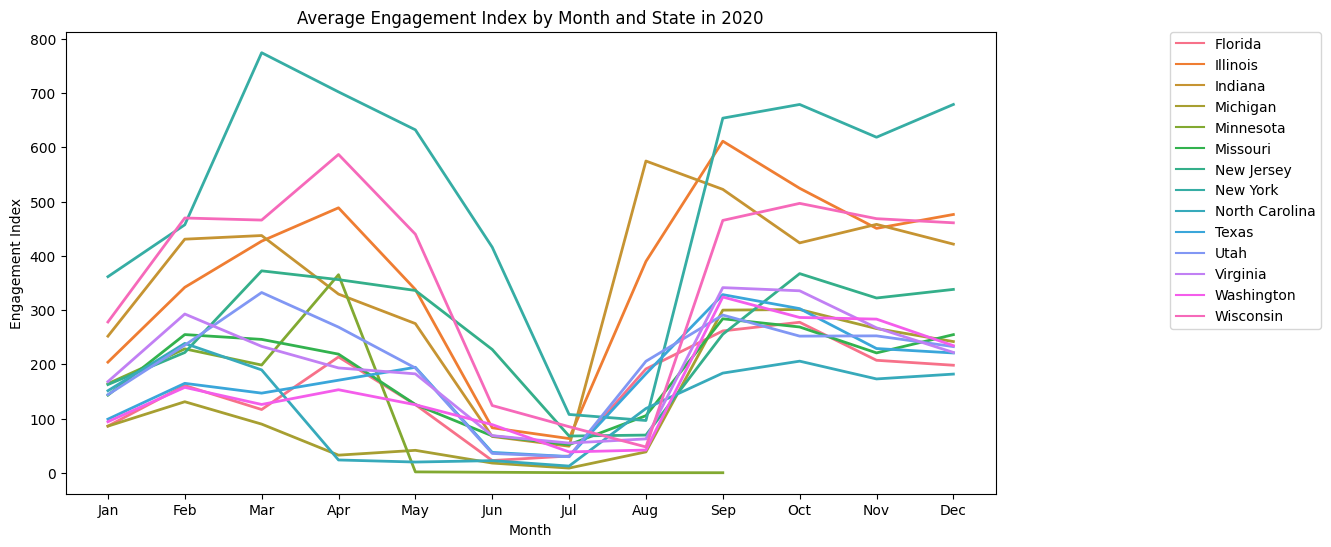

In [ ]:
# Create a line plot of engagement index by month and state
plt.figure(figsize=(12, 6))
plot1 = sns.lineplot(x = 'month', y = 'engagement_index', hue = 'state', data = plot_1_df, markers = True, linewidth=2)

# Set the x-tick labels to three-letter month abbreviations
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, len(months)+1), labels=months)

# Set the title and axes labels
plt.title('Average Engagement Index by Month and State in 2020')
plt.xlabel('Month')
plt.ylabel('Engagement Index')

# Adjust the legend position and title
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', borderaxespad=0)
plt.show()


After analyzing the data, it appears that there are common seasonal trends in engagement levels for most states. Except for the state of Minnesota, the data of which ended in October indicating uncomplete record, the engagement index for each of the state typically decreases as we approach June, hits its lowest point in August, and then starts to rise again in September. The highest engagement index is usually observed in April/May, with another peak occurring around November/December.

It can be inferred that the patterns across most states are due to the academic calendar, with the months of April, May, November, and December (usually the time of finals) having the highest school workload, while June to August is generally a period of summer vacation. We also notice that the state of New York generally have the highest engagement index during the school year, and this might be indicative of how the same products will generate a higher engagement index in states with higher population.

Overall, this data could be used to identify which states may benefit from targeted engagement campaigns and to explore the factors that influence engagement levels in different regions.

#### **3.1.2**: State Engagement Data Distribution
As aforementioned, from the previous plot, we notice that some states consistently had high engagement levels throughout the year, such as New York, Wisconsin, and Illinois. We want to get a summary of the distribution of our data to see whether there is any bias in our dataset that consistently produces higher averages for some of the states. We will visualize our dataset in the boxplot below:



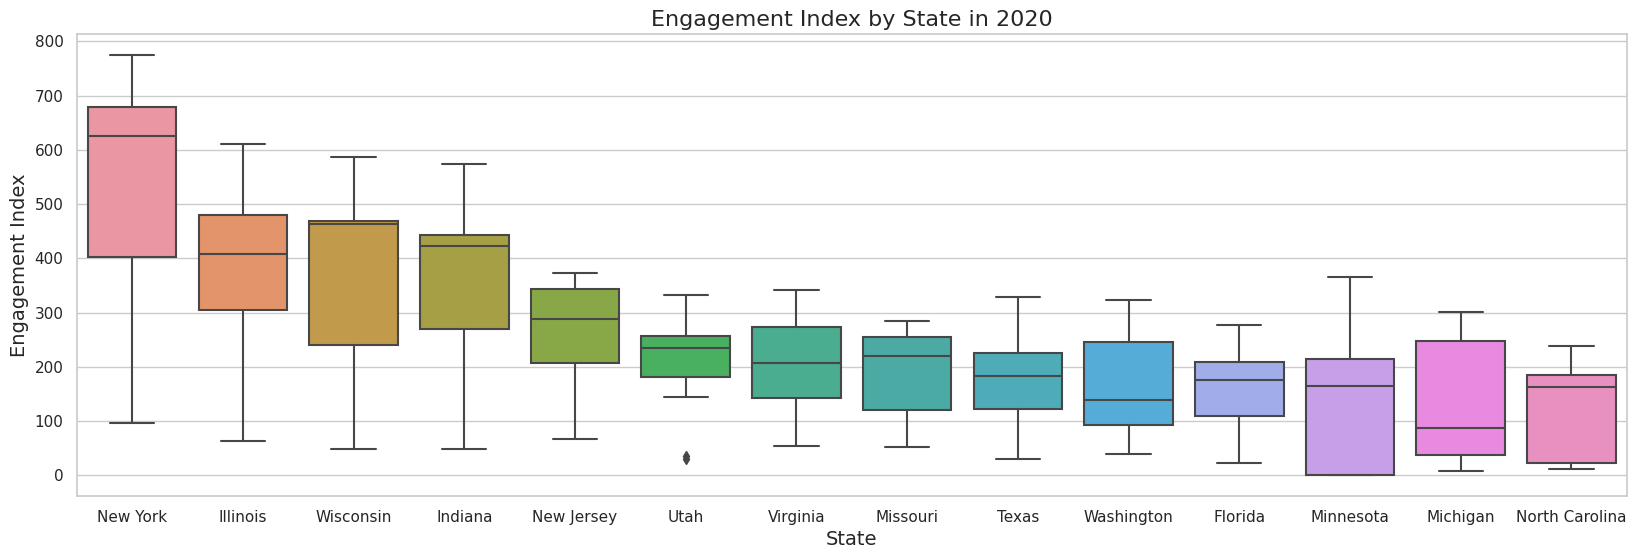

In [ ]:
# Calculate the average engagement index for each state
avg_engagement = plot_1_df.groupby('state')['engagement_index'].mean().sort_values(ascending=False)

# Reorder the dataframe based on the average engagement index
plot_1_df = plot_1_df.set_index('state').loc[avg_engagement.index].reset_index()

# Create the boxplot
sns.set(style="whitegrid")
plt.figure(figsize=(20,6))
sns.boxplot(x='state', y='engagement_index', data=plot_1_df, order=avg_engagement.index)

plt.title('Engagement Index by State in 2020', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Engagement Index', fontsize=14)
plt.show()

As we can see from the boxplot, states with higher annual average engagement index also have larger range of engagement index value in their entries. Moreover, these states (New York, Illinois, Wisconsin, Indiana) have data that is left-skewed, whereas some states with lower engagement index (Washington, Michigan) have data that is right-skewed. We rarely have state that has symmetrically distributed engagement data. This may indicate that the central tendency of engagement index for each state may be better evaluated with median instead of mean. Therefore, we will plot the median engagement index for each state against month to see if similar trend is exhibited.

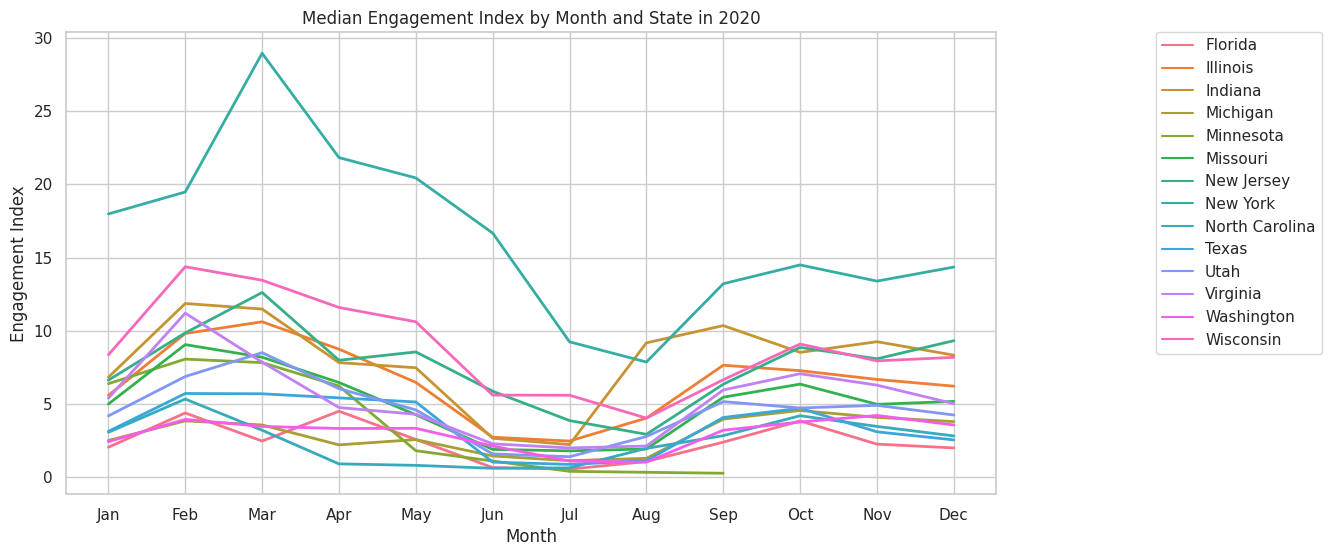

In [ ]:
#Group by state and month and get the median engagement index for each month in each state
plot_1_df = eng_by_state_month_df.groupby(['state','month']).median().reset_index()

# Create a line plot of engagement index by month and state
plt.figure(figsize=(12, 6))
plot1 = sns.lineplot(x = 'month', y = 'engagement_index', hue = 'state', data = plot_1_df, markers = True, linewidth=2)

# Set the x-tick labels to three-letter month abbreviations
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(ticks=range(1, len(months)+1), labels=months)

# Set the title and axes labels
plt.title('Median Engagement Index by Month and State in 2020')
plt.xlabel('Month')
plt.ylabel('Engagement Index')

# Adjust the legend position and title
plt.legend(bbox_to_anchor=(1.35, 1), loc='upper right', borderaxespad=0)
plt.show()

#Citation: https://www.geeksforgeeks.org/pandas-groupby-and-computing-median/

From the plot above, we see that seasonal trend similar to those that are previously described (drop during summer vacation, increase during academic year) of engagement index are observed in every state. Here, the gap between engagement index of New York and other states is enhanced. This agrees with the box plot, as New York's 50th percentile is way above every other state, whereas the amount that New York's mean exceeds others is not as apparent.

In summary, we can conclude that seasonal trend does exist in each state's engagement data, and that products applied in New York generates a higher engagement index perhaps due to the New York's concentrated population.

## **3.2**: Correlation of Numeric Variables

In this section we want to check for the correlation between features since certain models (e.g. Linear Regression) won't work well if we have strong multicollinearity. We first visualize the correlation between numeric features in engagement_df_final using a heatmap:

(Referece: Homework 4, Spring 2023)

In [ ]:
# Isolating the numeric features
num_df = engagement_df_final[['time', 'pct_access', 'weekday', 'pct_black_hisp', \
                              'pct_free_red', 'per-pupil expenditure']]

<ipython-input-34-2456f9e2eab3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = num_df.corr()


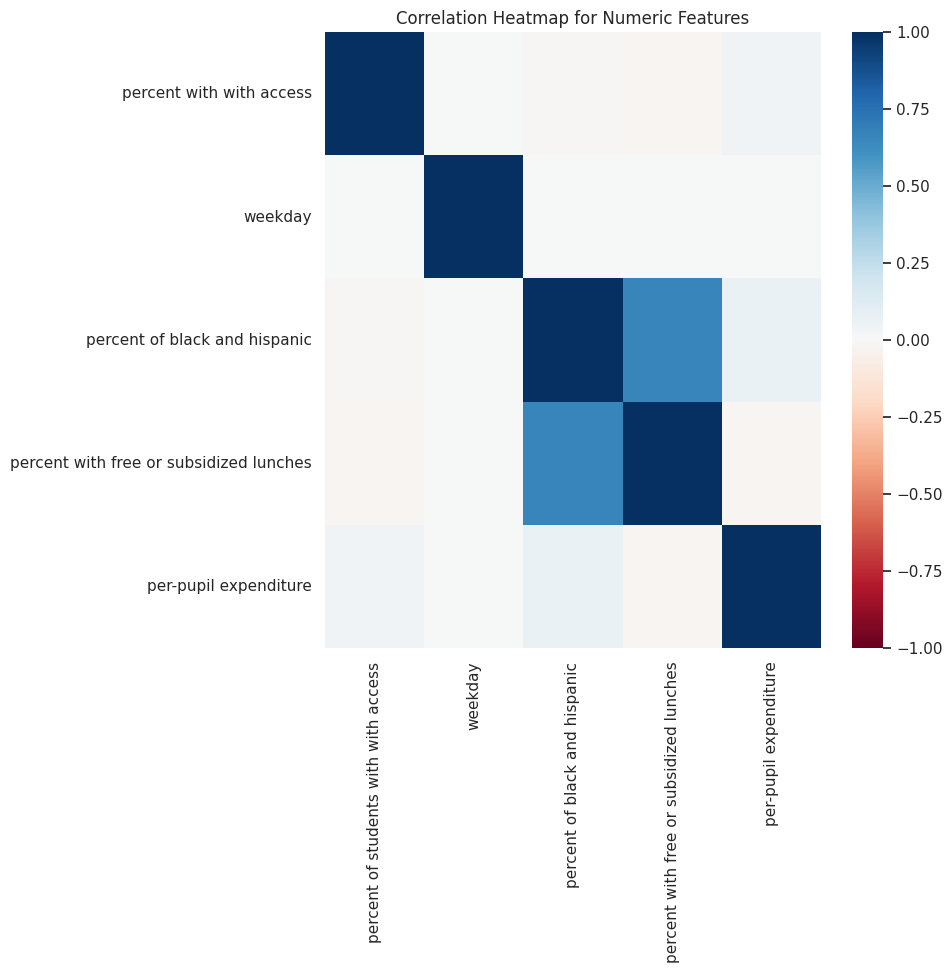

In [ ]:
# Plot correlation heatmap using numeric features
corr_mat = num_df.corr()

# change the plot size
plt.figure(figsize=(8,8))

hm = sns.heatmap(corr_mat, cmap = 'RdBu', vmin=-1, vmax=1, \
                 xticklabels= ["percent of students with with access", "weekday", \
                    "percent of black and hispanic", \
                    "percent with free or subsidized lunches", \
                    "per-pupil expenditure"], \
                 yticklabels = ["percent with with access", \
                    "weekday", \
                    "percent of black and hispanic", \
                    "percent with free or subsidized lunches", \
                    "per-pupil expenditure"])
# add appropriate title
hm.set(title = 'Correlation Heatmap for Numeric Features')
plt.show()

As the heatmap shows, there exists relatively strong correlation (0.75) between the percentage of black and hispanic students and the percentage of students receiving free or subsidized lunches. Our hypothesis is that the percentage of students receiving lunch aid may be an indicator for the average income of families that particular school districts, and the two may have a negative correlation. The positive correlation between percentage of students receiving school lunch aid and the percentage of black/hispanic students in turn makes the latter a indicator for average income as well. Based on the previous hypothesis, we further hypothesize that products that requires payment may not generate as high of an engagement index in districts with high percentage of students receiving lunch aid and black/hispanic students compared to elsewhere.


We see that for most of our numeric features, we do not have a strong correlation. We will keep all our numeric feature to feed into the machine learning model.


## **3.3**: Exploring the relationship between Location Features and the Engagement Index




We hope to explore differences and trends in engagement index under different conditions that are particular to certain locations. This information can be used to inform decisions related to resource allocation and intervention strategies, such as targeting interventions to support students in areas with lower engagement levels, or addressing unique challenges faced by certain groups of students.

Based off of original dataframe, in this section, we will explore the relationship between engagement index and these location specific variables.


1.  Locale
2.  Ethnicity of Students
3.  Percentage of students with lunch aid
4.  Per-Pupil Expenditure


(References: https://plotly.com/python/line-charts/;
https://plotly.com/python/box-plots/; https://plotly.com/python/reference/scatter/#scatter)


In [ ]:
# check the summary statistics
engagement_df_final.describe()

,pct_access,engagement_index,district_id,weekday,month,per-pupil expenditure,pct_black_hisp,pct_free_red,LP ID
count,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06,2.863125e+06
mean,1.196515e+00,2.874017e+02,5.223723e+03,1.996194e+00,6.725955e+00,2.218128e+04,4.809868e-01,7.597953e-01,5.474782e+04
std,5.069910e+00,2.283159e+03,2.640893e+03,1.398969e+00,3.632570e+00,7.048847e+03,4.234142e-01,4.015243e-01,2.677936e+04
min,0.000000e+00,1.000000e-02,1.052000e+03,0.000000e+00,1.000000e+00,1.000000e+04,2.000000e-01,2.000000e-01,1.053300e+04
25%,2.000000e-02,9.100000e-01,2.956000e+03,1.000000e+00,3.000000e+00,1.800000e+04,2.000000e-01,6.000000e-01,2.992100e+04
50%,9.000000e-02,5.190000e+00,4.921000e+03,2.000000e+00,7.000000e+00,2.200000e+04,2.000000e-01,6.000000e-01,5.503100e+04
75%,3.800000e-01,3.832000e+01,7.614000e+03,3.000000e+00,1.000000e+01,2.600000e+04,6.000000e-01,1.000000e+00,7.769800e+04
max,1.000000e+02,1.422068e+05,9.899000e+03,4.000000e+00,1.200000e+01,6.600000e+04,1.800000e+00,1.800000e+00,9.991600e+04


We modify `engagement_df_final` to include a week_number column, which would be the basis of our timeline and help us visualize how engagement index under different condition changes throughout the year of 2020.





In [ ]:
# gettig the week number column from the time column
engagement_df_final['Week_Number'] = engagement_df_final['time'].dt.isocalendar().week
engagement_df_final.head(3)

,time,pct_access,engagement_index,district_id,weekday,month,state,locale,per-pupil expenditure,pct_black_hisp,pct_free_red,LP ID,Sector(s),Primary Essential Function,Week_Number
0,2020-01-27,100.00,3000.00,8815,0,1,Illinois,Suburb,30000.0,0.2,0.2,32213,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),5
1,2020-02-26,25.00,1750.00,8815,2,2,Illinois,Suburb,30000.0,0.2,0.2,32213,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),9
2,2020-02-27,73.26,12947.27,8815,3,2,Illinois,Suburb,30000.0,0.2,0.2,32213,PreK-12; Higher Ed; Corporate,SDO - Learning Management Systems (LMS),9


##### 3.3.1 Locale vs. Engagement Index

We will first explore how engagement index varies throughout 2020 in different type of location. The four types of location recorded in our dataframe are: locale, suburb, city, and town, respectively.

In [ ]:
#Extracting related columns form engagement_df_final
plot_4_df = engagement_df_final[['locale','Week_Number','engagement_index']]

In [ ]:
#Using groupby to find the average engagement index in each type of locale for each week
plot_4_df = plot_4_df.groupby(['locale','Week_Number']).mean().reset_index()
#Converting Week_Number column to float for graphing
plot_4_df['Week_Number'] = plot_4_df['Week_Number'].astype(float)
plot_4_df.head(5)

,locale,Week_Number,engagement_index
0,City,1.0,18.289727
1,City,2.0,119.472411
2,City,3.0,154.193284
3,City,4.0,138.223847
4,City,5.0,156.861348


In [ ]:
#Creating a line plot that plot average engagement index as a function of week number
#for each type of locales
#Selecting custom color palette
colors = px.colors.qualitative.Plotly[0:4]

fig = px.line(plot_4_df, x='Week_Number', y='engagement_index', color='locale', markers=True,
              title='Weekly Average Engagement Index for Each Locale in 2020')

# Add a legend
fig.update_layout(legend=dict(title='locale', yanchor='top', y=1, xanchor='left', x=1),
                  margin=dict(l=50, r=20, t=80, b=50))

# Set axes labels
fig.update_xaxes(title_text='Weeks of 2020')
fig.update_yaxes(title_text='Average engagement index')

#Calculate overall average engagement index for each locale
rural_avg = plot_4_df[plot_4_df['locale'] =='Rural']['engagement_index'].mean()
city_avg = plot_4_df[plot_4_df['locale'] =='City']['engagement_index'].mean()
suburb_avg = plot_4_df[plot_4_df['locale'] =='Suburb']['engagement_index'].mean()
town_avg = plot_4_df[plot_4_df['locale'] =='Town']['engagement_index'].mean()

#Add horizontal lines that represent annual average engagement index for each locale
fig.add_shape(type='line', x0=plot_4_df['Week_Number'].min(), x1=plot_4_df['Week_Number'].max(),
              y0=rural_avg, y1=rural_avg,
              line=dict(color='red', width=2, dash='dash'))
fig.add_shape(type='line', x0=plot_4_df['Week_Number'].min(), x1=plot_4_df['Week_Number'].max(),
              y0=city_avg, y1=city_avg,
              line=dict(color='blue', width=2, dash='dash'))
fig.add_shape(type='line', x0=plot_4_df['Week_Number'].min(), x1=plot_4_df['Week_Number'].max(),
              y0=suburb_avg, y1=suburb_avg,
              line=dict(color='green', width=2, dash='dash'))
fig.add_shape(type='line', x0=plot_4_df['Week_Number'].min(), x1=plot_4_df['Week_Number'].max(),
              y0=town_avg, y1=town_avg,
              line=dict(color='purple', width=2, dash='dash'))


# Show the plot
fig.show()


In the graph above, we plot the weekly average engagement index against week number for each locale. Each horizontal line correspond to the annual average of engagement index for the locale with matching colors.

Interestingly, based on the graph above, we can see that engagement index varies across different locales: the highest average engagement index is observed in the rural locale, followed by suburb, town, and finally city. Because the lineplot of average engagement index is intermixed in some time frames, to confirm the existence this phenomenon, we further explore the distribution of engagement data for the four locales

In [ ]:
# Set Color
colors = px.colors.qualitative.Plotly[0:4]

# Create a box plot using
fig = px.box(plot_4_df, x='locale', y='engagement_index', color='locale',
             title='Distribution of Engagement Index by Locale', color_discrete_sequence=colors)

# Add a legend
fig.update_layout(legend=dict(title='locale', yanchor='top', y=1, xanchor='left', x=1),
                  margin=dict(l=50, r=20, t=80, b=50))

# Set axes labels
fig.update_yaxes(title_text='engagement index')


# Show the plot
fig.show()


As demonstrated by the boxplot above, rural has the highest variation in engagement index values with a left-skewed distribution, whereas city has the lowest variation with a right skewed distribution. Based on the distribution, we confirm that the further away we are from urban area (city), the higher the engagement contexts. This may be due to the fact that rural and suburban areas have fewer readily available educational resources compared to urban areas, leading students to utilize digital platforms, especially during covid period. This could indicate that companies should put more resources onto developing products that are specifically tailored towards the need of the students outside of urban areas.

##### 3.3.2 Race Makeup vs engagement index

Here we explore the relationship between the percentage of black and hispanic students in a district and their level of engagement, measured by the engagement index.

We create a new column called high/low that categorizes each row as either 'high' or 'low' based on whether the pct_black_hisp value is greater than a threshold of 0.481.

In [ ]:
# Select the necessary columns from engagement_df_final
plot_5_df = engagement_df_final[['Week_Number', 'pct_black_hisp', 'engagement_index']]

# Assign "high" or "low" based on the threshold of 0.481 for the percentage of black and hispanic students
plot_5_df['high/low'] = np.where(plot_5_df['pct_black_hisp'] > 0.481, 'high', 'low')

# Drop the pct_black_hisp column since it's no longer needed
plot_5_df = plot_5_df.drop(columns=['pct_black_hisp'])


<ipython-input-41-c86e3e21a955>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#convert Week_Nuber column to float for plotting
plot_5_df['Week_Number'] = plot_5_df['Week_Number'].astype(float)
#Using groupby to find the average engagement index for districts with high percentage of black/hispanic students
#and districts with low percentage of black/hispanic students
plot_5_df = plot_5_df.groupby(['high/low','Week_Number']).mean().reset_index()
plot_5_df

,high/low,Week_Number,engagement_index
0,high,1.0,9.905700
1,high,2.0,150.642360
2,high,3.0,165.085751
3,high,4.0,147.673932
4,high,5.0,164.665491
...,...,...,...
101,low,49.0,406.761012
102,low,50.0,415.818837
103,low,51.0,420.395008
104,low,52.0,152.820632


In [ ]:
# Create a line plot
fig = px.line(plot_5_df, x='Week_Number', y='engagement_index', color='high/low', markers=True,
              title='Weekly Average Engagement Index for high vs. low <br> percentage of black/hispanic students')

# Add a legend
fig.update_layout(legend=dict(title='percentage of <br> black/hispanic students', yanchor='top', y=1, xanchor='left', x=1),
                  margin=dict(l=50, r=20, t=80, b=50))

# Set axes labels
fig.update_xaxes(title_text='Weeks of 2020')
fig.update_yaxes(title_text='Average engagement index')

# Show the plot
fig.show()

In [ ]:

# Set Color
colors = px.colors.qualitative.Plotly[0:4]

# Create a box plot using
fig = px.box(plot_5_df, x='high/low', y='engagement_index', color='high/low',
             title='Distribution of Engagement Index by black/hispanic percentage', color_discrete_sequence=colors)

# Add a legend
fig.update_layout(legend=dict(title='high/low', yanchor='top', y=1, xanchor='left', x=1),
                  margin=dict(l=50, r=20, t=80, b=50))

# Set axes labels
fig.update_xaxes(title_text='Weeks of 2020')
fig.update_yaxes(title_text='engagement index')

# Show the plot
fig.show()


Based on the two graphs, we can see that schools with a high percentage of black/hispanic students generally have lower engagement indices compared to schools with a low percentage. However, both groups seem to follow a similar pattern over time, with engagement indices peaking around week 35 and decreasing towards the end of the year. This may confirm our previous hypothesis that, a higher percentage of black/hispanic students may indicate a higher percentage of families with lower socio-economic status who do not have sufficient access to e-learning products. Perhaps this is an indicator that more easily accessible products should be developed and distributed to specific student bodies who cannot readily access e-learning platforms.


#### **3.3.3** Percent of Students with Free or Subsidized Lunches vs. Engagement Index

Here we explore the relationship between the percentage of free and reduced-price lunch eligible students and the engagement index across different weeks.

The dataframe is separated into two dataframes based on the median value of pct_free_red.

The `engagement_index_high` represents the engagement index where the percentage of students receiving free/reduced lunch is high, and vice versa.

In [ ]:
# get the week number for engagment_df_final as float type
engagement_df_final['Week_Number'] = engagement_df_final['time'].dt.isocalendar().week
engagement_df_final['Week_Number'] = engagement_df_final['Week_Number'].astype(float)

# only selecting relevent columns for the plot
free_red_eng_raw = engagement_df_final[['Week_Number', 'pct_free_red', 'engagement_index']]

# separate low and high percent of free/reduced lunch based on the median of this column
free_red_eng_low = free_red_eng_raw[free_red_eng_raw['pct_free_red'] < 0.3]
free_red_eng_low = free_red_eng_low.groupby('Week_Number').mean().reset_index()
free_red_eng_low = free_red_eng_low.rename(columns = {'engagement_index' : 'low'})

free_red_eng_high = free_red_eng_raw[free_red_eng_raw['pct_free_red'] >= 0.3]
free_red_eng_high = free_red_eng_high.groupby('Week_Number').mean().reset_index()
free_red_eng_high = free_red_eng_high.rename(columns = {'engagement_index' : 'high'})

# merge the high table and the low table based on week number
free_red_eng = free_red_eng_low.merge(free_red_eng_high, on = 'Week_Number').drop(columns = ['pct_free_red_x','pct_free_red_y'])
free_red_eng.head(10)

,Week_Number,low,high
0,1.0,72.415884,37.030127
1,2.0,209.686149,160.498429
2,3.0,216.519986,169.986655
3,4.0,191.262481,152.735133
4,5.0,227.756993,178.950795
5,6.0,223.945118,168.189460
6,7.0,321.285270,262.008708
7,8.0,384.615241,306.620053
8,9.0,402.402981,333.835838
9,10.0,430.431935,334.945981


In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Add 'low' series
fig.add_trace(go.Scatter(x=free_red_eng['Week_Number'],
                         y=free_red_eng['low'],
                         mode='lines+markers',
                         name='Low',
                         marker=dict(symbol='circle')))

# Add 'high' series
fig.add_trace(go.Scatter(x=free_red_eng['Week_Number'],
                         y=free_red_eng['high'],
                         mode='lines+markers',
                         name='High',
                         marker=dict(symbol='circle')))

# Set axis labels
fig.update_xaxes(title_text='Weeks of 2020')
fig.update_yaxes(title_text='Average engagement index')
fig.update_layout(title='Weekly Average Engagement Index for High vs. Low Percentage of Students <br> With Free/Subsidized Lunches')


# Set legend title and position
fig.update_layout(legend=dict(title='Percent of <br> Free/Subsidized Lunches', yanchor='top', y=1, xanchor='left', x=1))

# Show the plot
fig.show()


Based on the two graphs, we can observe that schools with a high percentage of students receiving free or reduced-price lunches generally exhibit lower engagement indices compared to schools with a low percentage. Both groups appear to follow a similar pattern over time, with engagement indices peaking around week 35 and decreasing towards the end of the year.

These findings further validate our previous hypothesis and emphasize the need for additional assistance and support for students who may come from lower socio-economic backgrounds. By focusing on this demographic, we can help foster greater engagement in their education, thus bridging the gap between the two groups. This approach could involve implementing targeted e-learning programs, allocating resources more effectively, or providing training to teachers for better support and understanding of these students' needs. Ultimately, these measures can contribute to a more equitable and successful e-learning environment for all students.

#### **3.3.4** Per-Pupil Expenditure vs. Engagement Index

In this section we explore the relationship between the amount of per-pupil expenditure and the engagement index across different weeks.

In [ ]:
# Select the relevant columns for the plot
pp_eng_raw = engagement_df_final[['Week_Number', 'per-pupil expenditure', 'engagement_index']]

# separate low and high based on the median
pp_eng_low = pp_eng_raw[pp_eng_raw['per-pupil expenditure'] < 22000]
pp_eng_low = pp_eng_low.groupby('Week_Number').mean()
pp_eng_low = pp_eng_low.rename(columns = {'engagement_index' : 'low'})

pp_eng_high = pp_eng_raw[pp_eng_raw['per-pupil expenditure'] >= 22000]
pp_eng_high = pp_eng_high.groupby('Week_Number').mean()
pp_eng_high = pp_eng_high.rename(columns = {'engagement_index' : 'high'})

pp_eng = pp_eng_low.merge(pp_eng_high, on = 'Week_Number').drop(columns = ['per-pupil expenditure_x','per-pupil expenditure_y'])


In [ ]:
# Create a Plotly figure
fig = go.Figure()

# Add 'low' series
fig.add_trace(go.Scatter(x=pp_eng.index,
                         y=pp_eng['low'],
                         mode='lines+markers',
                         name='Low',
                         marker=dict(symbol='circle')))

# Add 'high' series
fig.add_trace(go.Scatter(x=pp_eng.index,
                         y=pp_eng['high'],
                         mode='lines+markers',
                         name='High',
                         marker=dict(symbol='circle')))

# Set axis labels
fig.update_xaxes(title_text='Weeks of 2020')
fig.update_yaxes(title_text='Average engagement index')
fig.update_layout(title='Weekly Average Engagement Index for Students With High vs. Low Per-Pupil Expenditure')

# Set title and legend title
fig.update_layout(title='Weekly Average Engagement Index for High vs. Low Per-Pupil Expenditure',
                  legend=dict(title='Per-Pupil Expenditure', yanchor='top', y=1, xanchor='left', x=1))

# Show the plot
fig.show()


The resulting graph reveals that students with low per-pupil expenditure consistently exhibit lower engagement indexes than those with high expenditure. This finding is similar to the previous exploratory data analysis conducted under section 3.3. Notably, both groups' engagement levels peak during Week 35. This may be an indicator that higher per-pupil expenditure means more resources for students, including e-learning resources, generating higher engagement index.

Additionally, the graph highlights that the high per-pupil expenditure group shows a more pronounced increase in engagement levels after Week 30 compared to the first 20 weeks of 2020. This observation suggests that these students are more accustomed to e-learning after extended exposure, making them more adaptable. Consequently, schools and state authorities need to identify ways to ensure equity in access to quality education, and assist financially disadvantaged students to engage more effectively with e-learning to facilitate their studies


## **3.4**: Exploring the relationship between Product variables and the Engagement Index

####**3.4.0** Describing Product-related variables

We will first explore how many different primary function/sectors there are for product.

In [ ]:
#Extract relevant columns from engagement_df_final
sector_df = engagement_df_final[['state', 'Sector(s)',	'Primary Essential Function']]
#using groupby to show how many different primary Essential function and sectors there are
function_sector_df = sector_df.groupby(['Primary Essential Function', 'Sector(s)']).count()
function_sector_df = function_sector_df.rename(columns = {'state': 'Count'}).sort_values(['Sector(s)', 'Count'], ascending = False).reset_index()
function_sector_df

,Primary Essential Function,Sector(s),Count
0,LC - Content Creation & Curation,PreK-12; Higher Ed; Corporate,226489
1,LC/CM/SDO - Other,PreK-12; Higher Ed; Corporate,155876
2,"LC - Sites, Resources & Reference",PreK-12; Higher Ed; Corporate,127169
3,LC - Study Tools,PreK-12; Higher Ed; Corporate,71425
4,"LC - Sites, Resources & Reference - Streaming ...",PreK-12; Higher Ed; Corporate,66037
...,...,...,...
69,"SDO - Data, Analytics & Reporting - Student In...",PreK-12,1368
70,"SDO - Environmental, Health & Safety (EHS) Com...",PreK-12,1356
71,"SDO - Data, Analytics & Reporting",PreK-12,162
72,"SDO - Data, Analytics & Reporting",Higher Ed; Corporate,8371


In [ ]:
#Displaying unique value of Primary Essential Function
function_sector_df['Primary Essential Function'].unique()

array(['LC - Content Creation & Curation', 'LC/CM/SDO - Other',
       'LC - Sites, Resources & Reference', 'LC - Study Tools',
       'LC - Sites, Resources & Reference - Streaming Services',
       'CM - Virtual Classroom - Video Conferencing & Screen Sharing',
       'LC - Digital Learning Platforms',
       'LC - Sites, Resources & Reference - Thesaurus & Dictionary',
       'SDO - Data, Analytics & Reporting - Site Hosting & Data Warehousing',
       'LC - Sites, Resources & Reference - Digital Collection & Repository',
       'LC - Sites, Resources & Reference - Encyclopedia',
       'CM - Classroom Engagement & Instruction - Assessment & Classroom Response',
       'LC - Online Course Providers & Technical Skills Development',
       'SDO - Learning Management Systems (LMS)',
       'LC - Study Tools - Q&A', 'SDO - Human Resources',
       'CM - Classroom Engagement & Instruction - Classroom Management',
       'LC - Career Planning & Job Search',
       'SDO - Data, Analytics &

In [ ]:
#Displaying unique value of Sectors
function_sector_df['Sector(s)'].unique()

array(['PreK-12; Higher Ed; Corporate', 'PreK-12; Higher Ed', 'PreK-12',
       'Higher Ed; Corporate', 'Corporate'], dtype=object)

As mentioned in Section 2,``"Primary Essential Function"`` in our dataframe refers to the functions of the product. There are two layers to the labels here. Products are first labeled as one of these three categories: **LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations**. Each of these categories have multiple sub-categories with which the associated functions are described more specifically. While there is no explicit explanation on how the original dataset categorized functions into such categories, based on the list of sub-functions under each category, we hypothesize that LC products will have emphasis on content curation and teaching, CM products will focus on facilitating communication and teaching atmosphere between students and teachers, whereas SDO products are mainly used for administrative matters. After analyzing the functions and sectors, we realize that there may be users other than students who can contribute to the engagement index. For example, teachers and school administrators can use SDO products for school system management.

We also want to explore the ``"Sector(s)"`` information, which indicates the school type(s) a product is being applied to. The Sector(s) indicate the range of users for each of the products. We have three categories for sectors: the first category consists of products used only in PreK-12 contexts; the second category consists of products used in the PreK-12 and Higher Ed context; products in the third category are used in PreK-12, higher ed, and corporate contexts.


In [ ]:
# Selcting columns relating to product features
func_raw_df = engagement_df_final[['state', 'Sector(s)',	'Primary Essential Function']]

# Using groupby on the Function and Sector columns, get the count of each combination
function_sector_df = func_raw_df.groupby(['Primary Essential Function', 'Sector(s)']).count().reset_index()
function_sector_df.rename(columns = {'state': 'Count'}).sort_values(['Sector(s)', 'Count'], ascending = False)[['Primary Essential Function', 'Sector(s)', 'Count']]

,Primary Essential Function,Sector(s),Count
17,LC - Content Creation & Curation,PreK-12; Higher Ed; Corporate,226489
51,LC/CM/SDO - Other,PreK-12; Higher Ed; Corporate,155876
29,"LC - Sites, Resources & Reference",PreK-12; Higher Ed; Corporate,127169
44,LC - Study Tools,PreK-12; Higher Ed; Corporate,71425
39,"LC - Sites, Resources & Reference - Streaming ...",PreK-12; Higher Ed; Corporate,66037
...,...,...,...
58,"SDO - Data, Analytics & Reporting - Student In...",PreK-12,1368
60,"SDO - Environmental, Health & Safety (EHS) Com...",PreK-12,1356
55,"SDO - Data, Analytics & Reporting",PreK-12,162
54,"SDO - Data, Analytics & Reporting",Higher Ed; Corporate,8371


In [ ]:
final_func_df = func_raw_df

# split the Function column into three columns for three layers of function
final_func_df[['Function Category', 'Function']] = final_func_df['Primary Essential Function'].str.split('-', 1, expand=True)
final_func_df[['Function Name', 'Function Detail']] = final_func_df['Function'].str.split('-', 1, expand=True)
final_func_df = final_func_df.drop(columns=['Primary Essential Function', 'Function'])


<ipython-input-53-8843b6c5a005>:4: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.

<ipython-input-53-8843b6c5a005>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-8843b6c5a005>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-53-8843b6c5a005>:5: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.

<ipython

In [ ]:
# group by to see the summary of the sectors and functions
func_summary_df = final_func_df.groupby(['Sector(s)', 'Function Category', 'Function Name', 'Function Detail']).count()
func_summary_df.rename(columns = {'state': 'Count'})

Count
Sector(s)                     Function Category Function Name                        Function Detail                             
PreK-12                       CM                 Classroom Engagement & Instruction   Assessment & Classroom Response        1521
                                                                                      Classroom Management                  17748
                                                                                      Communication & Messaging             22717
                                                 Teacher Resources                    Lesson Planning                       19581
                                                                                      Professional Learning                  2553
                              LC                 Sites, Resources & Reference         Digital Collection & Repository        5074
                                                                                      Encyclopedia                           9740
                                                                                      Games & Simulations                  170140
                                                 Sites, Resources & References        Learning Materials & Supplies         19290
                                                 Study Tools                          Q&A                                   18002
                                                                                      Test Prep & Study Skills              22763
                                                                                      Tutoring                               8888
                              SDO                Data, Analytics & Reporting          Site Hosting & Data Warehousing        5699
                                                                                      Student Information Systems (SIS)      1368
                                                 Large                               Scale & Standardized Testing           11407
                                                 School Management Software           Mobile Device Management               5724
                                                                                      SSO                                   15824
PreK-12; Higher Ed            CM                 Classroom Engagement & Instruction   Classroom Management                  12592
                                                 Teacher Resources                    Grading & Attendance                   5560
                                                                                      Professional Learning                  2352
                              LC                 Sites, Resources & Reference         Digital Collection & Repository       76459
                                                                                      Encyclopedia                           6012
                                                                                      Games & Simulations                   13074
                                                                                      Streaming Services                    27029
                                                 Study Tools                          Q&A                                   31860
                              SDO                School Management Software           SSO                                    5462
PreK-12; Higher Ed; Corporate CM                 Classroom Engagement & Instruction   Assessment & Classroom Response       28182
                                                                                      Classroom Management                  10500
                                                                                      Communication & Messaging              7248
                                                 Virtual Classroom                    Video Co

Since the products with function label "LC/CM/SDO - Other" do not provide us useful information with regard to the product characterisitcs and application, we decide to drop such products from our product dataframe.

Finally, we wish to see the engagment_index of different product categories and sectors.

In [ ]:
# drop products that has function label 'LC/CM/SDO-Other' and select the engagement index from the original df
prod_eng_df = engagement_df_final[['engagement_index','Sector(s)','Primary Essential Function','Week_Number']][engagement_df_final['Primary Essential Function']!= 'LC/CM/SDO - Other']
# Assigning function_cat column to displaying the type of function category for plotting, and drop
#Primary essential function column
prod_eng_df['function_cat'] = np.where(prod_eng_df['Primary Essential Function'].str.contains('SDO'),'SDO',
                              np.where(prod_eng_df['Primary Essential Function'].str.contains('LC'),'LC',
                              np.where(prod_eng_df['Primary Essential Function'].str.contains('CM'),'CM', 'NaN')))
prod_eng_df = prod_eng_df.drop(columns = {'Primary Essential Function'})

prod_eng_df

,engagement_index,Sector(s),Week_Number,function_cat
0,3000.00,PreK-12; Higher Ed; Corporate,5.0,SDO
1,1750.00,PreK-12; Higher Ed; Corporate,9.0,SDO
2,12947.27,PreK-12; Higher Ed; Corporate,9.0,SDO
3,892.04,PreK-12; Higher Ed; Corporate,9.0,SDO
4,20096.50,PreK-12; Higher Ed; Corporate,10.0,SDO
...,...,...,...,...
2863120,0.42,PreK-12,48.0,SDO
2863121,0.85,PreK-12,48.0,SDO
2863122,0.32,PreK-12,51.0,SDO
2863123,1.90,PreK-12,52.0,SDO


In [ ]:
#Now, we separate the cleaned dataframe by sectors to prepare for graphing
prod_eng_allsec_df = prod_eng_df[prod_eng_df['Sector(s)'] == 'PreK-12; Higher Ed; Corporate']
prod_eng_student_df = prod_eng_df[prod_eng_df['Sector(s)'] == 'PreK-12; Higher Ed']
prod_eng_k12_df = prod_eng_df[prod_eng_df['Sector(s)'] == 'PreK-12']


#### **3.4.1** PreK-12 Product Primary Function vs. Engagement Index



In this section, we want to visualize the weekly avgerage engagement index by function categories for products in Prek-12 sector. In other words, the CM (Classroom Management) , LC (Learning & Curriculum), and SDO (School & District) products' performance with respects to Prek-12 sector student engagements.


In [ ]:
#For products in the PreK-12 sector, drop the sector column, using groupby to find the weekly average
#engagement index for CM, LC, SDO products, respectively.
plot_k12_df = prod_eng_k12_df.drop(columns = {'Sector(s)'}).groupby(['function_cat','Week_Number']).mean().reset_index()
#convert week_number column to float for graphing
plot_k12_df['Week_Number'] = plot_k12_df['Week_Number'].astype(float)
plot_k12_df

,function_cat,Week_Number,engagement_index
0,CM,1.0,7.988889
1,CM,2.0,8.623580
2,CM,3.0,8.811791
3,CM,4.0,7.771787
4,CM,5.0,8.717580
...,...,...,...
154,SDO,49.0,798.282878
155,SDO,50.0,835.590610
156,SDO,51.0,821.745948
157,SDO,52.0,151.914108


In [ ]:
plot_k12_df.dtypes

function_cat         object
Week_Number         float64
engagement_index    float64
dtype: object

In [ ]:
#Creating a line plot that plot weekly average engagement index for CM, LC, SDO products
#in prek-12 sector

#Creating a figure in plotly
fig = go.Figure()

#adding lines as trace
fig.add_trace(go.Scatter(x=plot_k12_df['Week_Number'], y=plot_k12_df[plot_k12_df['function_cat'] == 'CM']['engagement_index'], mode='lines', name='CM'))
fig.add_trace(go.Scatter(x=plot_k12_df['Week_Number'], y=plot_k12_df[plot_k12_df['function_cat'] == 'LC']['engagement_index'], mode='lines', name='LC'))
fig.add_trace(go.Scatter(x=plot_k12_df['Week_Number'], y=plot_k12_df[plot_k12_df['function_cat'] == 'SDO']['engagement_index'], mode='lines', name='SDO'))

#Setting axes titles
fig.update_layout(title='Weekly avg engagement index by function categories for products <br> in Prek-12 sector',
                  xaxis_title='Week Number', yaxis_title='Average Engagement Index')

#adding legend
fig.update_layout(legend=dict(title='function category', x=1.05, y=1))

fig.show()


The analysis of the graph highlights some significant differences in engagement levels across the various product categories, and shed light on how users other than students who are active in the digital learning ecosystem also contribute to engagement performance. It is clear that Classroom Management (CM) products consistently underperform in terms of  engagement, whereas School & District Operation(SDO) products seems to generate the highest engagement index. We believe the high performance of SDO products is to be expected because it is natural for administrative logistic matters to be handled in an online environment during Covid19. The Learning & Curriculum (LC) products exhibit a similar pattern to the SDO products, indicating that they might served as complementary tools for SDO products. The low performance of CM might be due to the nature of its functionality: as seen from the prior list of functions, functions under CM consists of several functions accessed mainly by teachers (attendance, lesson planning, assessment, etc.). In other words, it is not necessory or possible for students to access some of the products labeled CM, which may explain its low engagement index.

One other notable observation is the spike in engagement levels for SDO products around week 35. This could possibly be attributed to specific events or initiatives in the school year that increase the relevance and usefulness of SDO products.

#### **3.4.2** PreK-12+Higher Ed Product Primary Function vs. Engagement Index




In this section, we want to visualize the weekly avgerage engagement index by function categories for products used in sectors that are considered both as Prek-12 and Higher Ed.

In [ ]:
#Use same step in 3.4.1 to prepare a dataframe for graphing
plot_student_df = prod_eng_student_df.drop(columns = {'Sector(s)'}).groupby(['function_cat','Week_Number']).mean().reset_index()
plot_student_df['Week_Number'] = plot_student_df['Week_Number'].astype(float)
plot_student_df

,function_cat,Week_Number,engagement_index
0,CM,1.0,1.135750
1,CM,2.0,10.770549
2,CM,3.0,14.481067
3,CM,4.0,14.777348
4,CM,5.0,20.854978
...,...,...,...
154,SDO,49.0,174.927770
155,SDO,50.0,210.790872
156,SDO,51.0,264.976788
157,SDO,52.0,65.928585


In [ ]:
#Creating a line plot that plot weekly average engagement index for CM, LC, SDO products
#in prek-12/Higher Ed sector

fig = go.Figure()

#adding lines as traces
fig.add_trace(go.Scatter(x=plot_student_df['Week_Number'], y=plot_student_df[plot_student_df['function_cat'] == 'CM']['engagement_index'], mode='lines', name='CM'))
fig.add_trace(go.Scatter(x=plot_student_df['Week_Number'], y=plot_student_df[plot_student_df['function_cat'] == 'LC']['engagement_index'], mode='lines', name='LC'))
fig.add_trace(go.Scatter(x=plot_student_df['Week_Number'], y=plot_student_df[plot_student_df['function_cat'] == 'SDO']['engagement_index'], mode='lines', name='SDO'))

#adding titles and axes labels
fig.update_layout(title='Weekly avg engagement index by function categories for products <br> in Prek-12/Higher-ed sector',
                  xaxis_title='Week Number', yaxis_title='Average Engagement Index')
#adding legend
fig.update_layout(legend=dict(title='Function Category', x=1.05, y=1))

fig.show()


Interestingly, while the engagement levels of LC and CM products remain relatively stable, the engagement level of SDO products has significantly decreased compared to products in the previous sector (PreK-12 only) and show irregular pattern when the corresponding products are applied in both PreK-12 and Higher Ed context. This may suggest that PreK-12 and higher-ed institutions have different needs for managing logistic and administrative matters, and providers have yet to curate a product that are tailored to the needs of both ends. Providers may want to conduct further customer research in this regard.

The peak engagement for SDO products occurs around week 35, whereas LC and CM products peak as early as week 10. This suggests that LC and CM products are more involved in the early stages of an e-learning program, while SDO products become more important in the later stages.



#### **3.4.3** PreK-12+Higher Ed + Corporate Product Primary Function vs. Engagement Index

In this section, we want to visualize the weekly avgerage engagement index by function categories for products used in sectors that are considered as Prek-12, Higher Ed, and Corporate.

In [ ]:
#Using the same step from 3.4.1, prepare our dataframe for graphing
plot_allsec_df = prod_eng_allsec_df.drop(columns = {'Sector(s)'}).groupby(['function_cat','Week_Number']).mean().reset_index()
plot_allsec_df['Week_Number'] = plot_allsec_df['Week_Number'].astype(float)
plot_allsec_df

,function_cat,Week_Number,engagement_index
0,CM,1.0,51.692579
1,CM,2.0,220.731418
2,CM,3.0,221.001110
3,CM,4.0,217.257042
4,CM,5.0,240.059391
...,...,...,...
154,SDO,49.0,1485.200952
155,SDO,50.0,1451.869521
156,SDO,51.0,1500.993171
157,SDO,52.0,310.486286


In [ ]:
#Creating a line plot that plot weekly average engagement index for CM, LC, SDO products
#in prek-12/Higher Ed sector
fig = go.Figure()

#adding lines as traces
fig.add_trace(go.Scatter(x=plot_allsec_df['Week_Number'], y=plot_allsec_df[plot_allsec_df['function_cat'] == 'CM']['engagement_index'], mode='lines', name='CM'))
fig.add_trace(go.Scatter(x=plot_allsec_df['Week_Number'], y=plot_allsec_df[plot_allsec_df['function_cat'] == 'LC']['engagement_index'], mode='lines', name='LC'))
fig.add_trace(go.Scatter(x=plot_allsec_df['Week_Number'], y=plot_allsec_df[plot_allsec_df['function_cat'] == 'SDO']['engagement_index'], mode='lines', name='SDO'))

#adding title and axes label
fig.update_layout(title='Weekly avg engagement index by function categories for products <br> in Prek-12/Higher-ed/Corporate sector',
                  xaxis_title='Week Number', yaxis_title='Average Engagement Index')
#adding legend
fig.update_layout(legend=dict(title='Function Category', x=1.05, y=1))

fig.show()


Based on the graph, we observed a significant increase in the engagement levels across all three function categories in sectors that are considered as Prek-12, Higher Ed, and Corporate. This may suggest that if a provider wants to create a product that generates higher engagement index, they should design the product so that it is able to be applied in as many context as possible— in this case, in both the educational realm and the business realm.

Furthermore, it is interesting to note that the patterns for CM (Classroom Management) products became different in these sectors. The engagement index for CM products increased dramatically. We hypothesize that this increase is due to the contribution of several functionality labeled as CM: Video conferencing, screen sharing, and communication/messaging. These are examples of functionalities with high universality that can be applied across various context. If this hypothesis stands, it would be a further confirmation that providers should aim to develop products that can be universally applied.

####3.4.4 Exploring Provider Representation


In this section, we want to explore which providers are the most represented in our dataframe.

(Reference: https://plotly.com/python/reference/pie/#pie)

In [ ]:
products_df_save.describe()

,LP ID
count,352.000000
mean,54250.039773
std,26431.322696
min,10533.000000
25%,29802.000000
50%,53434.000000
75%,76996.750000
max,99916.000000


In [ ]:
#Select Relevant column from engagement_df_final, and merge products_df_save to get information on
#product name and provider for each entry of the engagement_df_final dataframe
prod_rep_df = engagement_df_final[['LP ID','state','engagement_index']]
prod_rep_df.head(5)
prod_rep_df_final = pd.merge(prod_rep_df, products_df_save, on = 'LP ID')

In [ ]:
#Importing necessary libraries
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [ ]:
#Group by state and provider to get the number of entries of each provider in each state
prod_by_state = prod_rep_df_final[['state','Provider/Company Name']]
prod_by_state['count'] = 0
prod_by_state = prod_by_state.groupby(['Provider/Company Name','state']).count().reset_index()

#Select the top 10 providers for each state
groups = (prod_by_state.groupby('state').apply(lambda x: x.nlargest(10,'count')).reset_index(drop = True))

#Create subplot consisting of 2 by 7 grid
fig = make_subplots(rows = 2, cols=7,subplot_titles = groups['state'].unique(),specs=[[{'type': 'domain'}]*7]*2)

#Generating a list of states
states = groups['state'].unique().tolist()


#For each state, generate a pie-graph representing the percentage of entries for each of the top 10 providers
#relative to each others
for i in range(0, len(states)):
  data = prod_by_state[prod_by_state['state']==states[i]].nlargest(10,'count')
  labels = data['Provider/Company Name']
  values = data['count']
  pie_trace = go.Pie(labels=labels, values=values)
  fig.add_trace(pie_trace, row=int(i/7+1), col=int(i%7+1))
  #print(states[i],int(i/7+1),int(i%7+1))

fig.update_layout(title='Top 10 Provider Entries for Each State', height=550, width=1500)
fig.show()



<ipython-input-67-770c945c78e4>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Based on the graph, we can see that the Google LLC provider dominates across all states, indicating its popularity and widespread use in the educational sector.

The dominance of Google LLC provider in the online learning product market may be attributed to the versatility of its products, which cater to the unique needs of different educational institutions. The provider's range of educational tools includes Google Classroom, Google Drive, and other productivity and collaboration tools, which have become increasingly important in promoting student engagement and interactive learning. Further research could be done to explore how Google penetrates the market and achieve its dominance.

Additionally, the dominance of Google LLC provider across all 14 states indicates that educators are increasingly turning towards online learning solutions to enhance their teaching strategies. This trend has been further accelerated by the COVID-19 pandemic, which has led to the widespread adoption of remote learning technologies.

# **4.** Feature Engineering

As we can see in the current dataframe, the product functions of various kinds are jammed in one column, "Primary Essential Function". Since we want to use the details of the features as a part of the input for machine learning, we need to do some feature engineering to this column to get a clearer view of the functions of the products.

##4.0 Random Sampling
In this section, we prepare the data for feature engineering by first reducing the size to 100k rows.


Since the original engagement dafaframe has more than 2863125 rows, it makes the later process slow and often results in RAM crashing.

Therefore, we decide to reduce the size of the dataframe we will use by randomly sampling 100,000 rows from the original dataframe.

Random sampling ensures that our sample is representative of the population. Therefore, the models trained below will also produce parameters that generalize to the population.

Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

In [ ]:
# randomly sample 100k rows, make the sampling the same every time
engagement_df_small = engagement_df_final.sample(n = 100000, random_state = 42)
engagement_df_small

,time,pct_access,engagement_index,district_id,weekday,month,state,locale,per-pupil expenditure,pct_black_hisp,pct_free_red,LP ID,Sector(s),Primary Essential Function,Week_Number
1027898,2020-03-11,0.08,10.43,5510,2,3,Washington,City,30000.0,0.6,1.0,37153,PreK-12,LC - Digital Learning Platforms,11.0
332679,2020-06-11,0.59,11.20,8784,3,6,Illinois,Suburb,22000.0,1.4,1.4,26881,PreK-12,LC - Digital Learning Platforms,24.0
1679974,2020-10-29,1.92,260.55,1877,3,10,Illinois,Rural,26000.0,0.2,0.2,65797,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,44.0
164725,2020-03-27,0.30,45.66,1536,4,3,Indiana,Rural,18000.0,0.2,1.0,78818,PreK-12; Higher Ed,LC - Study Tools - Q&A,13.0
2646052,2020-10-05,0.07,7.02,4348,0,10,Missouri,Suburb,18000.0,0.2,0.6,28467,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39141,2020-04-23,67.71,80742.51,7798,3,4,New York,Rural,46000.0,0.2,0.6,95731,PreK-12; Higher Ed; Corporate,LC - Content Creation & Curation,17.0
1463403,2020-10-02,0.18,10.95,3864,4,10,Utah,Suburb,14000.0,0.2,0.2,72758,PreK-12; Higher Ed; Corporate,LC/CM/SDO - Other,40.0
2019884,2020-09-11,0.06,2.44,7980,4,9,Virginia,Rural,22000.0,0.2,1.0,94058,PreK-12; Higher Ed,LC - Study Tools,37.0
1962503,2020-12-22,1.93,494.50,3228,1,12,Indiana,Town,18000.0,0.2,1.0,65277,PreK-12,CM - Teacher Resources - Lesson Planning,52.0


## 4.1 One Hot Encoding




``"Primary Essential Function"`` in our dataframe refers to the functions of the product. There are two layers to the labels here. Products are first labeled as one of these three categories: **LC = Learning & Curriculum, CM = Classroom Management, and SDO = School & District Operations**. Each of these categories have multiple sub-categories with which the associated functions are described more specifically.

Next, we also want to feature engineer the ``"Sector(s)"`` information, which indicates the school type(s) a product is being applied to.
There are three categories for Sectors, **PreK-12; Higher Ed; Corporate'**.

Recall that we split the column "Primary Essential Function" into three columns "Function Category", "Function Name", "Function Detail" in section 3.4.0.

Now, we wish to do feature engineering on these categorical features in ``"final_func_sec_df"``.
One Hot Encoding: convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns:

- Use `pd.get_dummies()` to one hot encode the following columns:
  - `"Primary Essential Function"`
  - `"Sector(s)"`


(References: Homework 4, Spring 2023)

In [ ]:
# split the Function column into three columns for three layers of function
engagement_df_small[['Function Category', 'Function']] = engagement_df_small['Primary Essential Function'].str.split('-', 1, expand=True)
engagement_df_small[['Function Name', 'Function Detail']] = engagement_df_small['Function'].str.split('-', 1, expand=True)
engagement_df_small = engagement_df_small.drop(columns=['Primary Essential Function', 'Function'])

<ipython-input-69-c11e9f838cb1>:2: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.

<ipython-input-69-c11e9f838cb1>:3: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.



In [ ]:
engagement_df_small.head(10)

,time,pct_access,engagement_index,district_id,weekday,month,state,locale,per-pupil expenditure,pct_black_hisp,pct_free_red,LP ID,Sector(s),Week_Number,Function Category,Function Name,Function Detail
1027898,2020-03-11,0.08,10.43,5510,2,3,Washington,City,30000.0,0.6,1.0,37153,PreK-12,11.0,LC,Digital Learning Platforms,None
332679,2020-06-11,0.59,11.20,8784,3,6,Illinois,Suburb,22000.0,1.4,1.4,26881,PreK-12,24.0,LC,Digital Learning Platforms,None
1679974,2020-10-29,1.92,260.55,1877,3,10,Illinois,Rural,26000.0,0.2,0.2,65797,PreK-12; Higher Ed; Corporate,44.0,LC,Content Creation & Curation,None
164725,2020-03-27,0.30,45.66,1536,4,3,Indiana,Rural,18000.0,0.2,1.0,78818,PreK-12; Higher Ed,13.0,LC,Study Tools,Q&A
2646052,2020-10-05,0.07,7.02,4348,0,10,Missouri,Suburb,18000.0,0.2,0.6,28467,PreK-12; Higher Ed; Corporate,41.0,LC,Content Creation & Curation,None
2193806,2020-06-02,0.07,2.72,1705,1,6,Washington,City,26000.0,0.6,1.0,28701,PreK-12; Higher Ed; Corporate,23.0,LC/CM/SDO,Other,None
105241,2020-02-14,0.77,247.11,2779,4,2,Illinois,Rural,22000.0,0.2,0.2,96706,PreK-12; Higher Ed,7.0,LC,Courseware & Textbooks,None
682150,2020-08-21,0.15,8.02,1549,4,8,Virginia,Suburb,22000.0,0.2,0.6,77698,PreK-12; Higher Ed,34.0,LC,"Sites, Resources & Reference",Digital Collection & Repository
2471525,2020-06-03,0.27,6.81,7798,2,6,New York,Rural,46000.0,0.2,0.6,16753,PreK-12; Higher Ed,23.0,LC,Digital Learning Platforms,None
2337227,2020-02-27,0.00,0.07,5510,3,2,Washington,City,30000.0,0.6,1.0,44025,PreK-12; Higher Ed; Corporate,9.0,LC,Content Creation & Curation,None


In [ ]:
# create dummy variables for sectors and functions
final_df = pd.get_dummies(engagement_df_small, columns = ['Sector(s)', 'Function Category', \
                                               'Function Name', 'Function Detail','state', 'locale'])

In [ ]:
final_df

,time,pct_access,engagement_index,district_id,weekday,month,per-pupil expenditure,pct_black_hisp,pct_free_red,LP ID,...,state_North Carolina,state_Texas,state_Utah,state_Virginia,state_Washington,state_Wisconsin,locale_City,locale_Rural,locale_Suburb,locale_Town
1027898,2020-03-11,0.08,10.43,5510,2,3,30000.0,0.6,1.0,37153,...,0,0,0,0,1,0,1,0,0,0
332679,2020-06-11,0.59,11.20,8784,3,6,22000.0,1.4,1.4,26881,...,0,0,0,0,0,0,0,0,1,0
1679974,2020-10-29,1.92,260.55,1877,3,10,26000.0,0.2,0.2,65797,...,0,0,0,0,0,0,0,1,0,0
164725,2020-03-27,0.30,45.66,1536,4,3,18000.0,0.2,1.0,78818,...,0,0,0,0,0,0,0,1,0,0
2646052,2020-10-05,0.07,7.02,4348,0,10,18000.0,0.2,0.6,28467,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39141,2020-04-23,67.71,80742.51,7798,3,4,46000.0,0.2,0.6,95731,...,0,0,0,0,0,0,0,1,0,0
1463403,2020-10-02,0.18,10.95,3864,4,10,14000.0,0.2,0.2,72758,...,0,0,1,0,0,0,0,0,1,0
2019884,2020-09-11,0.06,2.44,7980,4,9,22000.0,0.2,1.0,94058,...,0,0,0,1,0,0,0,1,0,0
1962503,2020-12-22,1.93,494.50,3228,1,12,18000.0,0.2,1.0,65277,...,0,0,0,0,0,0,0,0,0,1


This ``"final_df"`` is the final dataframe with all features ready to be fed into ML models.

In [ ]:
# check the types of all features
final_df.dtypes

time                datetime64[ns]
pct_access                 float64
engagement_index           float64
district_id                  int64
weekday                      int64
                         ...      
state_Wisconsin              uint8
locale_City                  uint8
locale_Rural                 uint8
locale_Suburb                uint8
locale_Town                  uint8
Length: 81, dtype: object

# **5.**  Machine Learning
We plan to do both unsupervised and supervised machine learning.

For unsupervised ML, we want to perform PCA analysis on all the features we have to reduce the number of features and also reduce any strong correlations between them.

After that, we will use supervised ML algorithms, including linear regression, LASSO regression, Random Forest regressor, etc.


**Goal**: Given a product's features, timeframe, state information, predict the engagement index of the product.

**Input Features (X)**: timeframe, state, sector, function name, function detail, etc.

**Output Feature (y)**: Engagement Index.

(References: Homework 4, Spring 2023)

### **5.0** Preprocessing: Split Data into Train and Test

Now we prepare the data for machine learning tasks. We are using the dataframe `final_df`.

Given our goal of applying machine learning, we need to some preprocessing to the data as explained below.

Then, we separate the current dataframe into features matrix and the target matrix with the following columns:

Input Features (X): timeframe, state, sector, feature name, feature detail

Output Feature (y): Engagement Index.

First, to prepare for PCA, we need to convert the time data with the type `"datetime"` to another acceptable type. We decide to only keep the month information and store it as integers.


In [ ]:
final_df['month'] = final_df['time'].dt.month


Store the complete cleaned data to Drive.

In [ ]:
final_df.to_csv('100k.csv',index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# final_df = pd.read_csv('/content/100k.csv')

Narrow down the sample size by only considering the monthly average of engagement index:

To further reduce the size of the dataset and facilitate ML efficiency, we will be predicting the monthly average engagement index.

In [ ]:
# combine week, district, and product; and take the average engagement_index
final_df_1 = final_df.drop(columns = ['time','weekday'])
monthly_data_df_1 = final_df_1.groupby(['month', 'district_id', 'LP ID']).mean('engagement_index').reset_index()


Then, we drop the meaningless columns, such as Product ID and district ID. When being fed into models, values in these columns meaningless and therefore are not the features we want to include.

In [ ]:
monthly_data_df = monthly_data_df_1.drop(columns = ['district_id', 'LP ID'])

In [ ]:
monthly_data_df

,month,pct_access,engagement_index,per-pupil expenditure,pct_black_hisp,pct_free_red,Week_Number,Sector(s)_Corporate,Sector(s)_Higher Ed; Corporate,Sector(s)_PreK-12,...,state_North Carolina,state_Texas,state_Utah,state_Virginia,state_Washington,state_Wisconsin,locale_City,locale_Rural,locale_Suburb,locale_Town
0,1,0.06,0.600,34000.0,0.6,0.6,5.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,1.80,76.340,34000.0,0.6,0.6,4.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,0.12,1.795,34000.0,0.6,0.6,4.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0.04,0.400,34000.0,0.6,0.6,3.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,0.08,1.000,34000.0,0.6,0.6,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76503,12,0.03,0.600,26000.0,0.6,0.2,49.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76504,12,0.03,5.410,26000.0,0.6,0.2,52.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76505,12,8.69,624.170,26000.0,0.6,0.2,51.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
76506,12,5.71,399.160,26000.0,0.6,0.2,51.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Finally, we have the reduced-size, monthly data for ML models.

This final dataframe, ``"monthly_data_df"`` has 76,508 rows and 76 meaningful features (columns).

Save the dataframe to csv local.

In [ ]:
monthly_data_df.to_csv('monthly_data.csv',index = False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the final dataframe from Drive when needed to avoid data loading and cleaning everytime.

In [ ]:
# pd.read_csv('/content/monthly_data.csv')

In [ ]:
# Stores features dataframe into variable called "features"
features = monthly_data_df.drop(columns = ['engagement_index'])

In [ ]:
# Store the classification target variable into "target"
target = monthly_data_df['engagement_index']

The split is 80-20 meaning 80% for training and rest for testing.

In [ ]:
# Assign appropriate value to seed and conduct 80/20 train-test split with random_state = seed = 42
seed = 42

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state = seed)


## **5.1**: PCA

As we can see, there are more than 70 features (columns) in our final dataframe, which can be cumbersome and ineffective. In this section, we want to use PCA to reduce the number of dimensions and pick the optimal number of features for the regression models later.

(References: homework 4, Spring 2023)

In [ ]:
# Import necessary libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:
# Intermediate step to address fact that PCA is not scale-invariant
scaler = StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Instantiate and Fit PCA
pca = PCA(n_components = scaled_X_train.shape[1])
pca_X_train = pca.fit_transform(scaled_X_train)


In [ ]:
# Save the explained variance ratios into "explained_variance_ratios"
explained_variance_ratios = pca.explained_variance_ratio_

# Save the cumulative explained variance ratios into "cum_evr"
cum_evr = np.cumsum(pca.explained_variance_ratio_)
cum_evr

array([0.05002297, 0.08960038, 0.1251791 , 0.15833115, 0.18920738,
       0.2183218 , 0.24689464, 0.27501668, 0.30234211, 0.32945261,
       0.35620083, 0.38288538, 0.40937585, 0.4350864 , 0.46039869,
       0.48356273, 0.50395691, 0.52358547, 0.54066607, 0.55722486,
       0.57265973, 0.58781325, 0.60257441, 0.61721023, 0.63168235,
       0.64574875, 0.65969165, 0.67362599, 0.68741595, 0.7011566 ,
       0.71480404, 0.72837483, 0.74189164, 0.75527379, 0.76864004,
       0.78198529, 0.79530583, 0.80855822, 0.82180479, 0.83503232,
       0.84823874, 0.8614348 , 0.87461355, 0.88774876, 0.90087911,
       0.91396998, 0.92696741, 0.93988269, 0.95115036, 0.96129377,
       0.96978784, 0.97811248, 0.98503212, 0.99083362, 0.99655382,
       0.99850072, 0.99970481, 0.99988841, 0.99996318, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

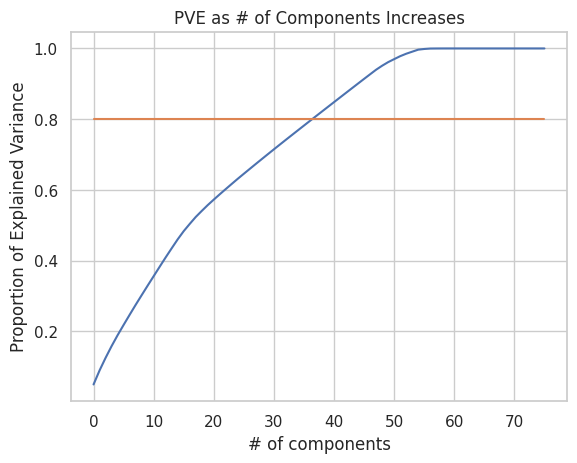

In [ ]:
# Find optimal num components to use (n) by plotting explained variance ratio
plt.plot(np.arange(0, 76), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.arange(0, 76), [0.8]*76)

plt.xlabel("# of components")
plt.ylabel("Proportion of Explained Variance")
plt.title("PVE as # of Components Increases")
plt.show()

_**Final PCA**_

After obtaining the PVE trend, we will choose a number (`n = 50`) that explains almost 100% total variance in the dataset. Another reason for choosing this number is that by adding more components, the incremental percentage of variance captured would not increase hugely. So, it is inefficient to choose a larger number of components.

Then we will re-fit and transform the PCA on the training set using this number.

In [ ]:
# Get transformed set of principal components on x_test:
# Refit and transform on training with parameter n (as deduced from the last step)
pca = PCA(n_components = 50)
X_train_pca = pca.fit_transform(scaled_X_train)

# Transform on Testing Set and store it as `X_test_pca`
X_test_pca = pca.transform(scaled_X_test)


For the ML models later, we will use `"X_train_pca"` as training data, and `"X_test_pca"` as test data.

## **5.2** Regression Models

In this section, multiple models will be fitted and assessed based on the accuracy measures.

We will then fine tune the hyperparameters of each model to explore the best values for the hyperparameters.


### **5.2.1** Linear Regression (sklearn)


We start by fitting a linear regression as the baseline model.

Reference: Homework4, Spring 2023

In [ ]:
# Import Linear Regression library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
# Initialize model with default parameters and fit it on the training set after PCA
reg = LinearRegression().fit(X_train_pca, y_train)

# Use the model to predict on the test set; save predictions as `y_pred`
y_pred = reg.predict(X_test_pca)

# Find the R-squared score; store the value in `lin_reg_score`
lin_reg_score = reg.score(X_test_pca, y_test)
lin_reg_score

print("R-squared: ", lin_reg_score)

R-squared:  0.513258382700689


Compute the mean squared error for linear regression.

In [ ]:
# Get root mean squared error as a metric for model performance
rmse = mean_squared_error(y_test, y_pred, squared=False)

# create a dictionary to store the model we use and its RMSE
model_rmse_dict = {}
model_rmse_dict['Linear \n Regression'] = rmse

print('RMSE:', rmse)

RMSE: 1367.491112232756


As we can see, linear regression results in decent R^2 value of 0.513 and Root Mean Square Error of 1367.5.

As the baseline model, the performance of linear regression will be used as a benchmark for later models.

### **5.2.2** LASSO Regression (Sklearn)

We will use Sklearn to do LASSO since PySpark is designed for large-scale datasets. PySpark may be a bit too complex for our dataset size and might introduce additional overhead in setting up and managing a Spark environment.

The motivation beind using LASSO regression is to see if shrinking or excluding less useful features would improve the accuracy of the model.

(References: homework 4, Spring 2023)

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Train the LASSO model
lasso = Lasso(alpha=1.0, random_state=42)
lasso.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print("R-squared: ", r2)

RMSE: 1367.2153158302146
R-squared:  0.5134546955671595


LASSO regression does not yield better accuracy than linear regression: we see the same R^2 and RMSE values.

#### Fine Tuning
We now want to fine-tune the Lasso Regression to find the best values for the hyperparameters.

(References: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV)

In [ ]:
#importing required libraries
from sklearn.linear_model import LassoCV

#Defining range of alpha values, starting small
alphas = np.logspace(-5,-2,100)

#Create a LassoCV object with cross-validation
lasso_cv = LassoCV(alphas=alphas, cv=5)
#fit the model on training data
lasso_cv.fit(X_train_scaled,y_train)

rmse = mean_squared_error(y_test, y_pred, squared=False)
model_rmse_dict['LASSO \n Regression'] = rmse

#printing best alpha value
print("Best alpha value:", lasso_cv.alpha_)
print("R-squared:",lasso_cv.score(X_test_scaled, y_test))

Best alpha value: 0.01
R-squared: 0.5132604660100734


After fine-tuning, we see the best largest R^2 value occurs when alpha = 0.01 for lasso regression. However, the R^2 value does not improve a lot after fine-tuning and is almost identical to the R^2 of linear regression.

### **5.2.3** Elastic Net (sklearn)

Then, we proceed to try the Elastic Net regression. The motivation behind this is that Elastic Net regression combines the penalty terms for both Lasso and Ridge regression, enabling it to deal with potentially correlated parameters. We would like to know if combing the Ridge and Lasso regression would result in better performance.

(References: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet)

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_pca)
X_test_scaled = scaler.transform(X_test_pca)

# Train the Elastic Net model
en = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42)
en.fit(X_train_scaled, y_train)

# Make predictions
y_pred = en.predict(X_test_scaled)



In [ ]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print('RMSE:', rmse)
print("R-squared: ", r2)

RMSE: 1414.3094725674518
R-squared:  0.4793590109235448


The R^2 value decreases while the RMSE increases, indicating Elastic Net regression may result in poorer accuracy than both LASSO and linear regression.

#### Fine Tuning

(This can take up to 50 minutes to run according to our experience.)

(References: https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'alpha': np.logspace(-5, 2, 50),
    'l1_ratio': np.linspace(0, 1, 21)
}

# Fine-tune the Elastic Net model using GridSearchCV
grid_search = GridSearchCV(en, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
elasNet_alpha = grid_search.best_params_['alpha']
elasNet_l1_ratio = grid_search.best_params_['l1_ratio']

print("Best alpha for Elastic Net: ", elasNet_alpha)
print("Best l1_ratio for Elastic Net: ", elasNet_l1_ratio)

KeyboardInterrupt: ignored

Best alpha for Elastic Net:  0.013894954943731374

Best l1_ratio for Elastic Net:  0.15000000000000002

Apply the best hyperparameters to the Elastic Net model.

In [ ]:
# Train the Elastic Net model with the best hyperparameters
en_best = ElasticNet(alpha=elasNet_alpha, l1_ratio=elasNet_l1_ratio, random_state=42)
en_best.fit(X_train_scaled, y_train)

# Make predictions
y_pred = en_best.predict(X_test_scaled)


In [ ]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
model_rmse_dict['Elastic Net'] = rmse

print('Fine-tuned RMSE for Elastic Net:', rmse)
print("Fine-tuned R-squared for Elastic Net: ", r2)

The two metrics improved after fine tuning to show better model goodness of fit as we see the RMSE value decreases and R^2 increases. These two values are again almost identical to those obtained from the previous models, showing similar performance of these models.


### **5.2.4** Random Forest Regressor (sklearn)
Random Forest Regressor works on non-binary predictions by using decision trees that are trained on continuous output variables. Therefore, we can apply a Random Forest Regressor to predict the engagement index.

Moreover, Random Forest Regressor is robust on dataset with outliers. From previous EDA, we can know that there exist many outliers in our data.

Random Forest Regressor is also suitabe for data with complex and non-linear underlying relationship between variables. Given the nature of our data, we wish to employ Random Forest Regressor to see if it would yield better results.

(References: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)


In [ ]:
# Import Necessary Features
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import parallel_backend

In [ ]:
#Using default parameter to initial lize a randomForestRegressor model
rf_model = RandomForestRegressor()

#Fitting the model on our data
rf_model.fit(X_train_pca,y_train)

#Getting prediction and mean squared error of our model
y_pred = rf_model.predict(X_test_pca)


In [ ]:
# getting r squared
rfr_score = rf_model.score(X_test_pca, y_test)
print('R_squared:', rfr_score)

R_squared: 0.7908951290424763


In [ ]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
model_rmse_dict['Random \n Forest'] = rmse
print('RMSE:', rmse)

RMSE: 896.3081527681896


#### Fine Tuning
The fine tuning for Random Forest Regressor ran for 2 hours+ without any output.
We are **commenting it out** because: 1). the accuracy of the model before fine tuning is good enough; 2). this block takes very long to run, hindering the progress when running the whole notebook.

(References: https://scikit-learn.org/stable/modules/grid_search.html#exhaustive-grid-search)

In [ ]:
# param_grid = {
# 	'n_estimators': [25, 50, 100, 150],
# 	'max_features': ['sqrt', 'log2', None],
# 	'max_depth': [3, 6, 9],
# 	'max_leaf_nodes': [3, 6, 9],
# }


In [ ]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# with parallel_backend('multiprocessing',n_jobs=-1):
# 	grid_search = GridSearchCV(RandomForestRegressor(),
# 						param_grid = param_grid)
# 	grid_search.fit(X_train_pca, y_train)
# print(grid_search.best_params_)


### **5.2.5** Gradient Boosting Machines (sklearn)

GBM combines multiple weak learners to create a strong learner. Specifically, it iteratively adds decision trees to the model, with each new tree being trained on the errors (residuals) of the previous trees.
GBM is also good at handling complex nonlinear relationships between features and the target and is less prone to overfitting. Therefore, we wish to try fitting a GBM on our data, which may not be linear.

References: https://towardsdatascience.com/understanding-gradient-boosting-machines-9be756fe76ab




In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Gradient Boosting model
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train_pca, y_train)

# Make predictions
y_pred = gbm.predict(X_test_pca)



In [ ]:
# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
model_rmse_dict['GBM'] = rmse

print('RMSE:', rmse)
print("R-squared: ", r2)


RMSE: 958.2440773346821
R-squared:  0.7609978854453472


## 5.3 Model Comparison

In this section, we compare all the ML models we explored above and select the best model. Here, we are looking at the RMSE value as the criterion for comparison. The RMSE value directly reflects the out-sample fit using the test data.

To do this, we utilize the RMSE dictionary we built along the way.




<ipython-input-107-c945cd30451d>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-107-c945cd30451d>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-107-c945cd30451d>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-107-c945cd30451d>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



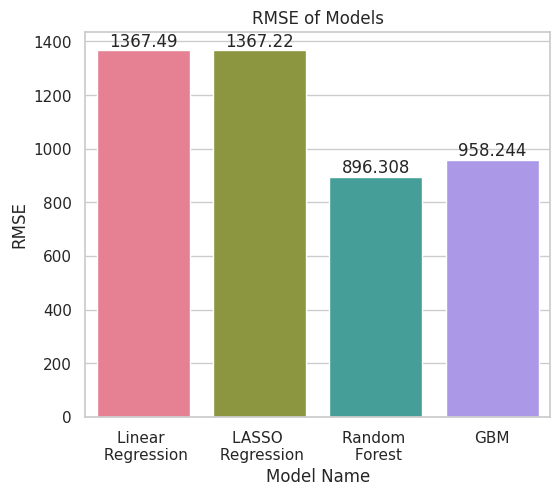

In [ ]:
compare_df = pd.DataFrame(columns=['Model Name', 'RMSE'])

for name, rmse in model_rmse_dict.items():
  compare_df = compare_df.append({'Model Name' : name, 'RMSE' : rmse}, ignore_index = True)

# plot the bar graph to compare models
plt.figure(figsize=(6,5))
plot = sns.barplot(data = compare_df, x = 'Model Name', y = 'RMSE', palette = 'husl')

# add title
plt.title("RMSE of Models")

# add x and y labels
plt.xlabel("Model Name")
plt.ylabel("RMSE")

for i in plot.containers:
    plot.bar_label(i,)
# show the plot
plt.show()


As shown in the bar graph, the model with the smallest RMSE is Random Forest Regressor. Since RMSE is a direct measure of out-sample fit, Random Forest Regressor has the most robust fitness. Therefore, we are choosing Random Forest Regressor as our final model for predicting the engagement index.

# **6.** Conclusion

  In conclusion, our project has made significant strides towards developing a predictive model that can effectively estimate the performance of educational products in terms of student engagement. Through the application of diverse machine learning models, such as Linear Regression, LASSO, Elastic Net, Random Forest, and Gradient Boosting Machine, we have been able to discern the relative strengths and weaknesses of each. Of these models, the Random Forest model outperformed the rest, achieving the lowest Root Mean Square Error (RMSE) of 907.265 and highest R-Square value of 0.78. This suggests that Random Forest is particularly well-suited for our dataset, likely due to its capacity to handle complex, non-linear relationships and interactions between variables.

  Our analysis has also shed light on the impact of socio-economic backgrounds and demographic factors on student engagement. We found that students from lower socio-economic backgrounds, including those receiving free/subsidized lunches and black and Hispanic students, tend to have lower engagement levels. This knowledge provides an invaluable opportunity for educators and policymakers to concentrate efforts in these areas, fostering more inclusive educational experiences that cater to students' diverse backgrounds, and  ensuring equity in access and adapt to quality education.

  In terms of product design, our findings suggest that versatile functionality is key in driving engagement. Classroom Management (CM) products that are adaptable across Prek-12, Higher Ed, and corporate sectors have been associated with higher engagement rates. Interestingly, School and District Operation (SDO) products seem to engage Prek-12 students more effectively, while engagement drops when these products are used in a combined Prek-12 and Higher-Ed setting. This insight indicates the need for customized solutions that meet the unique needs of different educational levels.

  The predictive model we have developed holds great potential in guiding the creation of new educational products and bringing awareness of equity when applying them in real life practice. By estimating the engagement of a product based on its specific features and functionality, our model can inform developers about the likely success of their products in our target districts. This evidence-based approach may enable a more targeted, efficient design process, and ultimately contribute to the creation of more effective educational products.